In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [2]:
data_dir = os.path.join('drive', 'MyDrive', 'data')

# IMPORTING PREVIOUSLY TRAINED MODELS

In [33]:
from tensorflow.keras.models import load_model

#ResNet50_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_200epoch.h5'))
#ENV2S_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch.h5'))
#VGG16_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch.h5'))
#DenseNet121_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_500epoch.h5'))

#ENV2S_model_20by20_fourier = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_82epoch_FT.h5'))
#model_20by20_fourier = load_model(os.path.join(data_dir, 'imageclassifier_3classes_model_20x20_70epoch_FT.h5'))

#DenseNet121_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_120epoch_SR.h5'))

ResNet50_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_ResNet50_20x20_70epoch.h5'))
ENV2S_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_V2.h5'))
VGG16_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_VGG16_20x20_200epoch_V2.h5'))
DenseNet121_model_20by20 = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_200epoch.h5'))

ENV2S_model_20by20_fourier = load_model(os.path.join(data_dir,'imageclassifier_3classes_ENV2S_20x20_200epoch_FT.h5'))
model_20by20_fourier = load_model(os.path.join(data_dir, 'imageclassifier_3classes_model_20x20_70epoch_FT.h5'))

DenseNet121_model_20by20_SurfRough = load_model(os.path.join(data_dir,'imageclassifier_3classes_DenseNet121_20x20_120epoch_SR_V2.h5'))

# FILES LIST

In [ ]:
file_list_not_ripples = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'not_ripples'))
file_list_transition = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'transition'))
file_list_ripples = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'ripples'))

#file_list_transition = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Jose', 'test_transition'))
#file_list_ripples = os.listdir(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Jose', 'test_ripples'))

# Data with ripples

In [ ]:
d = {'col1': ['File name'],
     'col2': ['result'], 'ResNet50': ['Ripple?'],
     'col4': ['result'], 'ENV2S': ['Ripple?'],
     'col6': ['result'], 'VGG16': ['Ripple?'],
     'col8': ['result'], 'DenseNet121': ['Ripple?'],
     'col10': ['blank'],
     'col12': ['result'], 'ENV2S_ft': ['Ripple?'],
     'col14': ['result'], 'model_ft': ['Ripple?'],
     'col20': ['result'], 'DenseNet121_SR': ['Ripple?']}
df_final_classification_ripples = pd.DataFrame(data=d)

f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty_ripples = pd.DataFrame(data=f)

In [ ]:
cm = plt.cm.viridis

for row in range(len(file_list_ripples)):
  name = file_list_ripples[row]
  splitted = name.split("_")
  #if splitted[4] == 'line01.png':
  img = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'ripples', name))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_ft = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'fourier', 'ripples', name))
  img_ft_rgb = cv2.cvtColor(img_ft, cv2.COLOR_BGR2RGB)
  #mosaic_1chan = img_rgb[:,:,0] + img_rgb[:,:,1] + img_rgb[:,:,2]
  #ft = np.fft.ifftshift(mosaic_1chan)
  #ft = np.fft.fft2(ft)
  #ft_ripples = np.fft.fftshift(ft)

  #ft_ripples_clipped = ft_ripples.clip(max=abs(np.percentile(ft_ripples, 100))/40)#8)

  #Transform scalar-data to four dimensional RGBA matrix (the fourth dimension is alpha)
  #norm = plt.Normalize(vmin=abs(ft_ripples_clipped).min(), vmax=abs(ft_ripples_clipped).max())
  #rgb_data = cm(norm(abs(ft_ripples_clipped)))
  #rgb_data = rgb_data[:,:,:3]
  #rgb_data = rgb_data*255
  #rgb_data = rgb_data.astype('uint8')

  #Attribute image
  img_attr = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'attribute', 'ripples', name))
  img_attr = cv2.cvtColor(img_attr, cv2.COLOR_BGR2RGB)
#-------------First classification-------------
  ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ResNet50_pred = np.argmax(ResNet50)
  if ResNet50_pred == 0:
    ResNet50_result = 'NO'
  if ResNet50_pred == 1:
    ResNet50_result = 'T'
  if ResNet50_pred == 2:
    ResNet50_result = 'YES'

  ENV2S = ENV2S_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ENV2S_pred = np.argmax(ENV2S)
  if ENV2S_pred == 0:
    ENV2S_result = 'NO'
  if ENV2S_pred == 1:
    ENV2S_result = 'T'
  if ENV2S_pred == 2:
    ENV2S_result = 'YES'

  VGG16 = VGG16_model_20by20.predict(np.expand_dims(img_rgb, 0))
  VGG16_pred = np.argmax(VGG16)
  if VGG16_pred == 0:
    VGG16_result = 'NO'
  if VGG16_pred == 1:
    VGG16_result = 'T'
  if VGG16_pred == 2:
    VGG16_result = 'YES'

  DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(img_rgb, 0))
  DenseNet121_pred = np.argmax(DenseNet121)
  if DenseNet121_pred == 0:
    DenseNet121_result = 'NO'
  if DenseNet121_pred == 1:
    DenseNet121_result = 'T'
  if DenseNet121_pred == 2:
    DenseNet121_result = 'YES'

#-------------Final classification-------------
  #final = a_ResNet50*0.25 + a_ENV2S*0.25 + a_VGG16*0.25 + a_DenseNet121*0.25
  #if final >= 0.75:
  #  final_result = 'NO'
  #else:
  #  final_result = 'YES'
#-------------Fourier classification-------------
  ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
  if ENV2S_fourier_pred == 0:
    ENV2S_fourier_result = 'NO'
  if ENV2S_fourier_pred == 1:
    ENV2S_fourier_result = 'T'
  if ENV2S_fourier_pred == 2:
    ENV2S_fourier_result = 'YES'

  model_fourier = model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  model_fourier_pred = np.argmax(model_fourier)
  if model_fourier_pred == 0:
    model_fourier_result = 'NO'
  if model_fourier_pred == 1:
    model_fourier_result = 'T'
  if model_fourier_pred == 2:
    model_fourier_result = 'YES'

#-------------Attribute classification-------------
  DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
  if DenseNet121_SR_pred == 0:
    DenseNet121_SR_result = 'NO'
  if DenseNet121_SR_pred == 1:
    DenseNet121_SR_result = 'T'
  if DenseNet121_SR_pred == 2:
    DenseNet121_SR_result = 'YES'

  print(row)
  df_final_classification_ripples.loc[len(df_final_classification_ripples.index)] = [name,
                                                                                    ResNet50[0][ResNet50_pred], ResNet50_result,
                                                                                    ENV2S[0][ENV2S_pred], ENV2S_result,
                                                                                    VGG16[0][VGG16_pred], VGG16_result,
                                                                                    DenseNet121[0][DenseNet121_pred], DenseNet121_result,
                                                                                    '---',
                                                                                    ENV2S_fourier[0][ENV2S_fourier_pred], ENV2S_fourier_result,
                                                                                    model_fourier[0][model_fourier_pred], model_fourier_result,
                                                                                    DenseNet121_SR[0][DenseNet121_SR_pred], DenseNet121_SR_result]
  df_final_certainty_ripples.loc[len(df_final_certainty_ripples.index)] = [name,
                                                                           ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                                           ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                                           VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                                           DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                                           ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                                           model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                                           DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

In [ ]:
df_final_classification_ripples.to_csv(os.path.join(data_dir, 'df_final_classification_ripples_V2.txt'), index=False)
df_final_certainty_ripples.to_csv(os.path.join(data_dir, 'df_final_certainty_ripples_V2.txt'), index=False)

In [ ]:
df_final_certainty_ripples

In [ ]:
df_final_classification_ripples

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_2600_column_3800_line02.png,0.985878,YES,0.91054,YES,0.991711,YES,0.580882,YES,---,0.964115,YES,0.993649,YES,0.958214,YES
2,row_2650_column_3450_line02.png,0.989768,YES,0.987753,YES,0.974189,YES,0.802313,YES,---,0.985301,YES,0.999185,YES,0.979351,YES
3,row_2650_column_3500_line02.png,0.990458,YES,0.831096,YES,0.998512,YES,0.579074,YES,---,0.996386,YES,0.998353,YES,0.982315,YES
4,row_2650_column_3700_line02.png,0.645787,YES,0.535955,T,0.934666,YES,0.877796,NO,---,0.724293,YES,0.881044,YES,0.98942,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,row_2600_column_3450_line02.png,0.98713,YES,0.820515,YES,0.985189,YES,0.95189,YES,---,0.993499,YES,0.970699,YES,0.991434,YES
1305,row_2600_column_3400_line02.png,0.993023,YES,0.984796,YES,0.996184,YES,0.901408,YES,---,0.996738,YES,0.709978,T,0.97947,YES
1306,row_2600_column_3650_line02.png,0.933614,YES,0.712079,YES,0.993866,YES,0.838519,NO,---,0.983873,YES,0.999723,YES,0.989256,NO
1307,row_2600_column_3700_line02.png,0.94318,YES,0.913963,YES,0.989668,YES,0.534898,NO,---,0.963367,YES,0.988228,YES,0.98058,NO


# Data transition zone

In [ ]:
d = {'col1': ['File name'],
     'col2': ['result'], 'ResNet50': ['Ripple?'],
     'col4': ['result'], 'ENV2S': ['Ripple?'],
     'col6': ['result'], 'VGG16': ['Ripple?'],
     'col8': ['result'], 'DenseNet121': ['Ripple?'],
     'col10': ['blank'],
     'col12': ['result'], 'ENV2S_ft': ['Ripple?'],
     'col14': ['result'], 'model_ft': ['Ripple?'],
     'col20': ['result'], 'DenseNet121_SR': ['Ripple?']}
df_final_classification_transition = pd.DataFrame(data=d)

f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty_transition = pd.DataFrame(data=f)

In [ ]:
cm = plt.cm.viridis
for row in range(len(file_list_transition)):
  name = file_list_transition[row]
  splitted = name.split("_")
  #if splitted[4] == 'line01.png':
  img = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'transition', name))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_ft = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'fourier', 'transition', name))
  img_ft_rgb = cv2.cvtColor(img_ft, cv2.COLOR_BGR2RGB)
  #mosaic_1chan = img_rgb[:,:,0] + img_rgb[:,:,1] + img_rgb[:,:,2]
  #ft = np.fft.ifftshift(mosaic_1chan)
  #ft = np.fft.fft2(ft)
  #ft_ripples = np.fft.fftshift(ft)

  #ft_ripples_clipped = ft_ripples.clip(max=abs(np.percentile(ft_ripples, 100))/40)#8)

  #Transform scalar-data to four dimensional RGBA matrix (the fourth dimension is alpha)
  #norm = plt.Normalize(vmin=abs(ft_ripples_clipped).min(), vmax=abs(ft_ripples_clipped).max())
  #rgb_data = cm(norm(abs(ft_ripples_clipped)))
  #rgb_data = rgb_data[:,:,:3]
  #rgb_data = rgb_data*255
  #rgb_data = rgb_data.astype('uint8')

  #Attribute image
  img_attr = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'attribute', 'transition', name))
  img_attr = cv2.cvtColor(img_attr, cv2.COLOR_BGR2RGB)
#-------------First classification-------------
  ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ResNet50_pred = np.argmax(ResNet50)
  if ResNet50_pred == 0:
    ResNet50_result = 'NO'
  if ResNet50_pred == 1:
    ResNet50_result = 'T'
  if ResNet50_pred == 2:
    ResNet50_result = 'YES'

  ENV2S = ENV2S_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ENV2S_pred = np.argmax(ENV2S)
  if ENV2S_pred == 0:
    ENV2S_result = 'NO'
  if ENV2S_pred == 1:
    ENV2S_result = 'T'
  if ENV2S_pred == 2:
    ENV2S_result = 'YES'

  VGG16 = VGG16_model_20by20.predict(np.expand_dims(img_rgb, 0))
  VGG16_pred = np.argmax(VGG16)
  if VGG16_pred == 0:
    VGG16_result = 'NO'
  if VGG16_pred == 1:
    VGG16_result = 'T'
  if VGG16_pred == 2:
    VGG16_result = 'YES'

  DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(img_rgb, 0))
  DenseNet121_pred = np.argmax(DenseNet121)
  if DenseNet121_pred == 0:
    DenseNet121_result = 'NO'
  if DenseNet121_pred == 1:
    DenseNet121_result = 'T'
  if DenseNet121_pred == 2:
    DenseNet121_result = 'YES'

#-------------Final classification-------------
  #final = a_ResNet50*0.25 + a_ENV2S*0.25 + a_VGG16*0.25 + a_DenseNet121*0.25
  #if final >= 0.75:
  #  final_result = 'NO'
  #else:
  #  final_result = 'YES'
#-------------Fourier classification-------------
  ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
  if ENV2S_fourier_pred == 0:
    ENV2S_fourier_result = 'NO'
  if ENV2S_fourier_pred == 1:
    ENV2S_fourier_result = 'T'
  if ENV2S_fourier_pred == 2:
    ENV2S_fourier_result = 'YES'

  model_fourier = model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  model_fourier_pred = np.argmax(model_fourier)
  if model_fourier_pred == 0:
    model_fourier_result = 'NO'
  if model_fourier_pred == 1:
    model_fourier_result = 'T'
  if model_fourier_pred == 2:
    model_fourier_result = 'YES'

#-------------Attribute classification-------------
  DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
  if DenseNet121_SR_pred == 0:
    DenseNet121_SR_result = 'NO'
  if DenseNet121_SR_pred == 1:
    DenseNet121_SR_result = 'T'
  if DenseNet121_SR_pred == 2:
    DenseNet121_SR_result = 'YES'

  print(row)
  df_final_classification_transition.loc[len(df_final_classification_transition.index)] = [name,
                                                                                          ResNet50[0][ResNet50_pred], ResNet50_result,
                                                                                          ENV2S[0][ENV2S_pred], ENV2S_result,
                                                                                          VGG16[0][VGG16_pred], VGG16_result,
                                                                                          DenseNet121[0][DenseNet121_pred], DenseNet121_result,
                                                                                          '---',
                                                                                          ENV2S_fourier[0][ENV2S_fourier_pred], ENV2S_fourier_result,
                                                                                          model_fourier[0][model_fourier_pred], model_fourier_result,
                                                                                          DenseNet121_SR[0][DenseNet121_SR_pred], DenseNet121_SR_result]
  df_final_certainty_transition.loc[len(df_final_certainty_transition.index)] = [name,
                                                                                 ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                                                 ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                                                 VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                                                 DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                                                 ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                                                 model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                                                 DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

In [ ]:
df_final_classification_transition.to_csv(os.path.join(data_dir, 'df_final_classification_transition_V2.txt'), index=False)
df_final_certainty_transition.to_csv(os.path.join(data_dir, 'df_final_certainty_transition_V2.txt'), index=False)

In [ ]:
df_final_classification_transition

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_300_column_1550_line02.png,0.550996,T,0.683574,T,0.811721,T,0.88932,NO,---,0.767874,T,0.786373,YES,0.899974,YES
2,row_300_column_1600_line02.png,0.738409,T,0.616651,T,0.975015,T,0.822346,NO,---,0.651866,T,0.96715,T,0.841912,YES
3,row_300_column_1650_line02.png,0.606251,T,0.4761,T,0.511792,T,0.995595,NO,---,0.936531,NO,0.84155,YES,0.924175,NO
4,row_300_column_1700_line02.png,0.66177,YES,0.628698,T,0.843895,NO,0.997819,NO,---,0.998078,NO,0.954299,T,0.809977,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,row_850_column_500_line01.png,0.731513,NO,0.927347,T,0.568095,NO,0.99872,NO,---,0.919131,YES,0.999858,YES,0.517171,T
648,row_900_column_1050_line01.png,0.904424,NO,0.904011,T,0.857627,T,0.999559,NO,---,0.502354,T,0.993585,YES,0.864672,NO
649,row_900_column_550_line01.png,0.865751,NO,0.72074,T,0.72077,NO,0.998039,NO,---,0.506339,T,0.998792,YES,0.740862,T
650,row_900_column_600_line01.png,0.421932,YES,0.380603,T,0.825671,YES,0.999378,NO,---,0.789608,YES,0.939044,YES,0.910779,YES


[[0.00194509 0.04660555 0.95144933]]


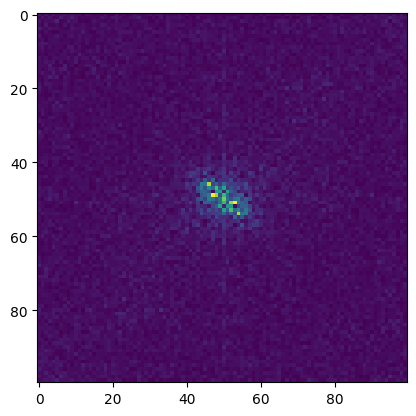

In [ ]:
print(ENV2S_fourier)
plt.imshow(img_ft_rgb)

# Data with no ripples

In [ ]:
df_final_classification_ripples = pd.read_csv(os.path.join(data_dir, 'df_final_classification_ripples_V2.txt'), delimiter=",")

In [ ]:
df_final_classification_transition = pd.read_csv(os.path.join(data_dir, 'df_final_classification_transition_V2.txt'), delimiter=",")

In [ ]:
df_final_classification_not_ripples = pd.read_csv(os.path.join(data_dir, 'df_final_classification_not_ripples_V2.txt'), delimiter=",")
df_final_certainty_not_ripples = pd.read_csv(os.path.join(data_dir, 'df_final_certainty_not_ripples_V2.txt'), delimiter=",")

In [ ]:
d = {'col1': ['File name'],
     'col2': ['result'], 'ResNet50': ['Ripple?'],
     'col4': ['result'], 'ENV2S': ['Ripple?'],
     'col6': ['result'], 'VGG16': ['Ripple?'],
     'col8': ['result'], 'DenseNet121': ['Ripple?'],
     'col10': ['blank'],
     'col12': ['result'], 'ENV2S_ft': ['Ripple?'],
     'col14': ['result'], 'model_ft': ['Ripple?'],
     'col20': ['result'], 'DenseNet121_SR': ['Ripple?']}
df_final_classification_not_ripples = pd.DataFrame(data=d)

f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty_not_ripples = pd.DataFrame(data=f)

In [ ]:
for row in range(2000, len(file_list_not_ripples)):
  name = file_list_not_ripples[row]
  splitted = name.split("_")
  #if splitted[4] == 'line01.png':
  img = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'not_ripples', name))
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  img_ft = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'fourier', 'not_ripples', name))
  img_ft_rgb = cv2.cvtColor(img_ft, cv2.COLOR_BGR2RGB)
  #mosaic_1chan = img_rgb[:,:,0] + img_rgb[:,:,1] + img_rgb[:,:,2]
  #ft = np.fft.ifftshift(mosaic_1chan)
  #ft = np.fft.fft2(ft)
  #ft_ripples = np.fft.fftshift(ft)

  #ft_ripples_clipped = ft_ripples.clip(max=abs(np.percentile(ft_ripples, 100))/8)

  #Transform scalar-data to four dimensional RGBA matrix (the fourth dimension is alpha)
  #norm = plt.Normalize(vmin=abs(ft_ripples_clipped).min(), vmax=abs(ft_ripples_clipped).max())
  #rgb_data = cm(norm(abs(ft_ripples_clipped)))
  #rgb_data = rgb_data[:,:,:3]
  #rgb_data = rgb_data*255
  #rgb_data = rgb_data.astype('uint8')

  #Attribute image
  img_attr = cv2.imread(os.path.join(data_dir, 'Lines_for_test', '20x20', 'Lineas_Sonarwiz', 'attribute', 'not_ripples', name))
  img_attr = cv2.cvtColor(img_attr, cv2.COLOR_BGR2RGB)
#-------------First classification-------------
  ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ResNet50_pred = np.argmax(ResNet50)
  if ResNet50_pred == 0:
    ResNet50_result = 'NO'
  if ResNet50_pred == 1:
    ResNet50_result = 'T'
  if ResNet50_pred == 2:
    ResNet50_result = 'YES'

  ENV2S = ENV2S_model_20by20.predict(np.expand_dims(img_rgb, 0))
  ENV2S_pred = np.argmax(ENV2S)
  if ENV2S_pred == 0:
    ENV2S_result = 'NO'
  if ENV2S_pred == 1:
    ENV2S_result = 'T'
  if ENV2S_pred == 2:
    ENV2S_result = 'YES'

  VGG16 = VGG16_model_20by20.predict(np.expand_dims(img_rgb, 0))
  VGG16_pred = np.argmax(VGG16)
  if VGG16_pred == 0:
    VGG16_result = 'NO'
  if VGG16_pred == 1:
    VGG16_result = 'T'
  if VGG16_pred == 2:
    VGG16_result = 'YES'

  DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(img_rgb, 0))
  DenseNet121_pred = np.argmax(DenseNet121)
  if DenseNet121_pred == 0:
    DenseNet121_result = 'NO'
  if DenseNet121_pred == 1:
    DenseNet121_result = 'T'
  if DenseNet121_pred == 2:
    DenseNet121_result = 'YES'

#-------------Final classification-------------
  #final = a_ResNet50*0.25 + a_ENV2S*0.25 + a_VGG16*0.25 + a_DenseNet121*0.25
  #if final >= 0.75:
  #  final_result = 'NO'
  #else:
  #  final_result = 'YES'
#-------------Fourier classification-------------
  ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
  if ENV2S_fourier_pred == 0:
    ENV2S_fourier_result = 'NO'
  if ENV2S_fourier_pred == 1:
    ENV2S_fourier_result = 'T'
  if ENV2S_fourier_pred == 2:
    ENV2S_fourier_result = 'YES'

  model_fourier = model_20by20_fourier.predict(np.expand_dims(img_ft_rgb,0))#rgb_data, 0))
  model_fourier_pred = np.argmax(model_fourier)
  if model_fourier_pred == 0:
    model_fourier_result = 'NO'
  if model_fourier_pred == 1:
    model_fourier_result = 'T'
  if model_fourier_pred == 2:
    model_fourier_result = 'YES'

#-------------Attribute classification-------------
  DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(img_attr, 0))
  DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
  if DenseNet121_SR_pred == 0:
    DenseNet121_SR_result = 'NO'
  if DenseNet121_SR_pred == 1:
    DenseNet121_SR_result = 'T'
  if DenseNet121_SR_pred == 2:
    DenseNet121_SR_result = 'YES'

  print(row)
  df_final_classification_not_ripples.loc[len(df_final_classification_not_ripples.index)] = [name,
                                                                                            ResNet50[0][ResNet50_pred], ResNet50_result,
                                                                                            ENV2S[0][ENV2S_pred], ENV2S_result,
                                                                                            VGG16[0][VGG16_pred], VGG16_result,
                                                                                            DenseNet121[0][DenseNet121_pred], DenseNet121_result,
                                                                                            '---',
                                                                                            ENV2S_fourier[0][ENV2S_fourier_pred], ENV2S_fourier_result,
                                                                                            model_fourier[0][model_fourier_pred], model_fourier_result,
                                                                                            DenseNet121_SR[0][DenseNet121_SR_pred], DenseNet121_SR_result]
  df_final_certainty_not_ripples.loc[len(df_final_certainty_not_ripples.index)] = [name,
                                                                                    ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                                                    ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                                                    VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                                                    DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                                                    ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                                                    model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                                                    DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

In [ ]:
df_final_classification_not_ripples.to_csv(os.path.join(data_dir, 'df_final_classification_not_ripples_V2.txt'), index=False)
df_final_certainty_not_ripples.to_csv(os.path.join(data_dir, 'df_final_certainty_not_ripples_V2.txt'), index=False)

In [ ]:
df_final_classification_not_ripples

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_4700_column_5000_line04.png,0.9946516752243042,NO,0.9972135424613953,NO,0.7427114844322205,NO,0.9958509206771851,NO,---,0.9284264445304871,T,0.8547213673591614,YES,0.9339765906333923,NO
2,row_4700_column_5150_line04.png,0.9947713017463684,NO,0.9953806400299072,NO,0.9745540022850037,NO,0.8311520218849182,NO,---,0.9231716394424438,T,0.9997333884239197,T,0.8390702605247498,NO
3,row_4700_column_5200_line04.png,0.9931071400642395,NO,0.9971889853477478,NO,0.9934593439102173,NO,0.984645664691925,NO,---,0.6278397440910339,T,0.9601231813430786,T,0.5014641284942627,YES
4,row_4750_column_4650_line04.png,0.9987693428993225,NO,0.9979725480079651,NO,0.9992508292198181,NO,0.9991658926010132,NO,---,0.9967190623283386,NO,0.538921594619751,T,0.9884085059165955,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,row_6000_column_5050_line03.png,0.996308,NO,0.99963,NO,0.993117,NO,0.696856,NO,---,0.980207,NO,0.992677,NO,0.993157,NO
3888,row_6000_column_5100_line03.png,0.999223,NO,0.998425,NO,0.955613,NO,0.656612,YES,---,0.993222,NO,0.943327,NO,0.993825,NO
3889,row_6000_column_5300_line03.png,0.981017,NO,0.998486,NO,0.982495,NO,0.655863,YES,---,0.962262,NO,0.990427,NO,0.99121,NO
3890,row_6000_column_5350_line03.png,0.997976,NO,0.999548,NO,0.998829,NO,0.920583,NO,---,0.994023,NO,0.9996,NO,0.993724,NO


In [ ]:
DenseNet121_SR[0,:]

array([0.6366997, 0.9998381, 0.9999294], dtype=float32)

# CREATE Y_TRUE TRUE VALUE LIST

In [ ]:
a = ["YES" for x in range(len(file_list_ripples))]
b = ["T" for x in range(len(file_list_transition))]
c = ["NO" for x in range(len(file_list_not_ripples))]
d = np.concatenate((a,b,c))

# CREATE Y_PRED VALUES OF PREDICTION

Ripples

In [ ]:
ResNet_final_pred = df_final_classification_ripples['ResNet50'].values
ENV2S_final_pred = df_final_classification_ripples['ENV2S'].values
VGG16_final_pred = df_final_classification_ripples['VGG16'].values
DenseNet_final_pred = df_final_classification_ripples['DenseNet121'].values
ENV2S_FT_final_pred = df_final_classification_ripples['ENV2S_ft'].values
ResNet50_FT_final_pred = df_final_classification_ripples['model_ft'].values
DenseNet_SR_final_pred = df_final_classification_ripples['DenseNet121_SR'].values

ResNet_final_pred = ResNet_final_pred[1:]
ENV2S_final_pred = ENV2S_final_pred[1:]
VGG16_final_pred = VGG16_final_pred[1:]
DenseNet_final_pred = DenseNet_final_pred[1:]
ENV2S_FT_final_pred = ENV2S_FT_final_pred[1:]
ResNet50_FT_final_pred = ResNet50_FT_final_pred[1:]
DenseNet_SR_final_pred = DenseNet_SR_final_pred[1:]

Transition

In [ ]:
ResNet_final_pred_transition = df_final_classification_transition['ResNet50'].values
ENV2S_final_pred_transition = df_final_classification_transition['ENV2S'].values
VGG16_final_pred_transition = df_final_classification_transition['VGG16'].values
DenseNet_final_pred_transition = df_final_classification_transition['DenseNet121'].values
ENV2S_FT_final_pred_transition = df_final_classification_transition['ENV2S_ft'].values
ResNet50_FT_final_pred_transition = df_final_classification_transition['model_ft'].values
DenseNet_SR_final_pred_transition = df_final_classification_transition['DenseNet121_SR'].values

ResNet_final_pred_transition = ResNet_final_pred_transition[1:]
ENV2S_final_pred_transition = ENV2S_final_pred_transition[1:]
VGG16_final_pred_transition = VGG16_final_pred_transition[1:]
DenseNet_final_pred_transition = DenseNet_final_pred_transition[1:]
ENV2S_FT_final_pred_transition = ENV2S_FT_final_pred_transition[1:]
ResNet50_FT_final_pred_transition = ResNet50_FT_final_pred_transition[1:]
DenseNet_SR_final_pred_transition = DenseNet_SR_final_pred_transition[1:]

Not ripples

In [ ]:
ResNet_final_pred_not_ripples = df_final_classification_not_ripples['ResNet50'].values
ENV2S_final_pred_not_ripples = df_final_classification_not_ripples['ENV2S'].values
VGG16_final_pred_not_ripples = df_final_classification_not_ripples['VGG16'].values
DenseNet_final_pred_not_ripples = df_final_classification_not_ripples['DenseNet121'].values
ENV2S_FT_final_pred_not_ripples = df_final_classification_not_ripples['ENV2S_ft'].values
ResNet50_FT_final_pred_not_ripples = df_final_classification_not_ripples['model_ft'].values
DenseNet_SR_final_pred_not_ripples = df_final_classification_not_ripples['DenseNet121_SR'].values

ResNet_final_pred_not_ripples = ResNet_final_pred_not_ripples[1:]
ENV2S_final_pred_not_ripples = ENV2S_final_pred_not_ripples[1:]
VGG16_final_pred_not_ripples = VGG16_final_pred_not_ripples[1:]
DenseNet_final_pred_not_ripples = DenseNet_final_pred_not_ripples[1:]
ENV2S_FT_final_pred_not_ripples = ENV2S_FT_final_pred_not_ripples[1:]
ResNet50_FT_final_pred_not_ripples = ResNet50_FT_final_pred_not_ripples[1:]
DenseNet_SR_final_pred_not_ripples = DenseNet_SR_final_pred_not_ripples[1:]

Concatenate all three classes

In [ ]:
ResNet_final = np.concatenate((ResNet_final_pred, ResNet_final_pred_transition, ResNet_final_pred_not_ripples))
ENV2S_final = np.concatenate((ENV2S_final_pred, ENV2S_final_pred_transition, ENV2S_final_pred_not_ripples))
VGG16_final = np.concatenate((VGG16_final_pred, VGG16_final_pred_transition, VGG16_final_pred_not_ripples))
DenseNet_final = np.concatenate((DenseNet_final_pred, DenseNet_final_pred_transition, DenseNet_final_pred_not_ripples))
ENV2S_FT_final = np.concatenate((ENV2S_FT_final_pred, ENV2S_FT_final_pred_transition, ENV2S_FT_final_pred_not_ripples))
ResNet50_FT_final = np.concatenate((ResNet50_FT_final_pred, ResNet50_FT_final_pred_transition, ResNet50_FT_final_pred_not_ripples))
DenseNet_SR_final = np.concatenate((DenseNet_SR_final_pred, DenseNet_SR_final_pred_transition, DenseNet_SR_final_pred_not_ripples))

# CALULATE CONFUSION MATRIX

In [ ]:
confusion_ResNet=confusion_matrix(d, ResNet_final, normalize='true')
confusion_ENV2S=confusion_matrix(d, ENV2S_final, normalize='true')
confusion_VGG16=confusion_matrix(d, VGG16_final, normalize='true')
confusion_DenseNet=confusion_matrix(d, DenseNet_final, normalize='true')

confusion_ENV2S_FT=confusion_matrix(d, ENV2S_FT_final, normalize='true')
confusion_ResNet50_FT=confusion_matrix(d, ResNet50_FT_final, normalize='true')
confusion_DenseNet_SR=confusion_matrix(d, DenseNet_SR_final, normalize='true')

PLOT CONFUSION MATRIX

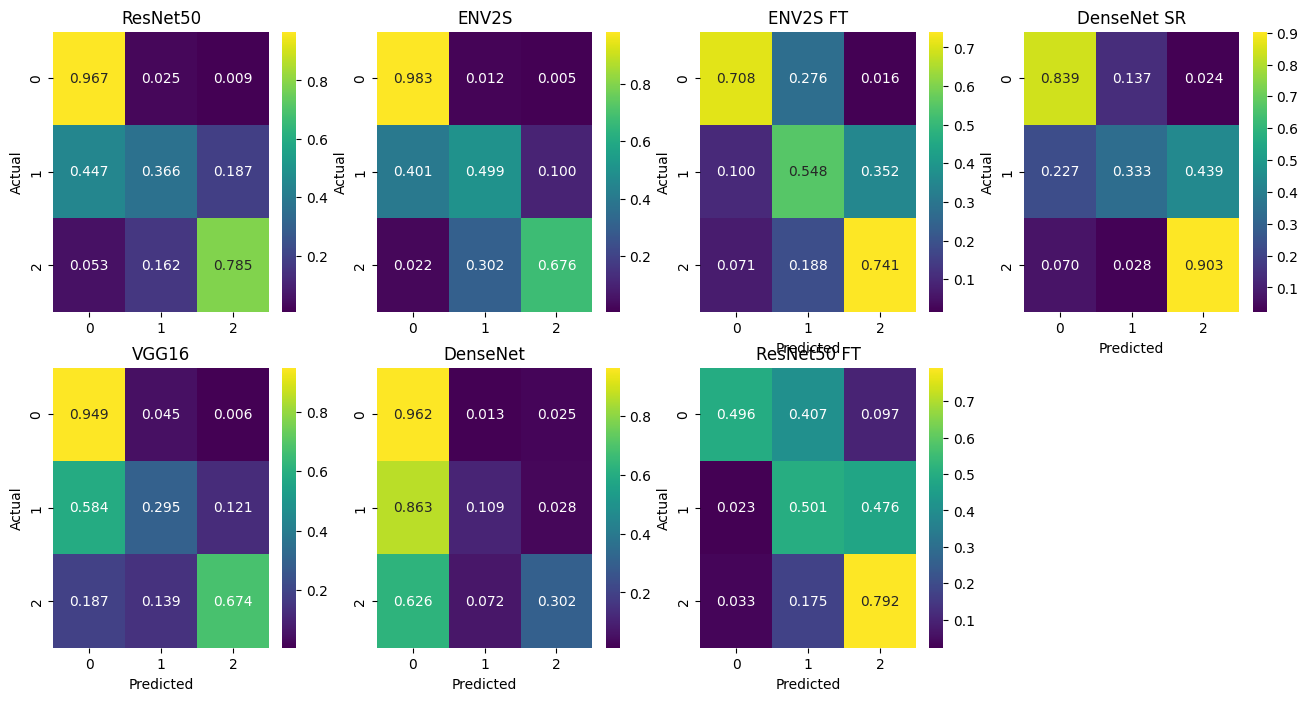

In [ ]:
fig = plt.figure(figsize=(16, 8))
plt.subplot(241)
sns.heatmap(confusion_ResNet, annot=True, cmap='viridis', fmt=".3f") #"g" para que salga sin notacion cientifica
plt.title("ResNet50")
plt.ylabel("Actual")

plt.subplot(242)
sns.heatmap(confusion_ENV2S, annot=True, cmap='viridis', fmt=".3f")
plt.title("ENV2S")
plt.ylabel("Actual")

plt.subplot(245)
sns.heatmap(confusion_VGG16, annot=True, cmap='viridis', fmt=".3f")
plt.title("VGG16")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.subplot(246)
sns.heatmap(confusion_DenseNet, annot=True, cmap='viridis', fmt=".3f")
plt.title("DenseNet")
plt.xlabel("Predicted")

plt.subplot(243)
sns.heatmap(confusion_ENV2S_FT, annot=True, cmap='viridis', fmt=".3f")
plt.title("ENV2S FT")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(247)
sns.heatmap(confusion_ResNet50_FT, annot=True, cmap='viridis', fmt=".3f")
plt.title("ResNet50 FT")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(244)
sns.heatmap(confusion_DenseNet_SR, annot=True, cmap='viridis', fmt=".3f")
plt.title("DenseNet SR")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

In [ ]:
df_final_classification_transition

,col1,col2,ResNet50,col4,ENV2S,col6,VGG16,col8,DenseNet121,col10,col12,ENV2S_ft,col14,model_ft,col20,DenseNet121_SR
0,File name,result,Ripple?,result,Ripple?,result,Ripple?,result,Ripple?,blank,result,Ripple?,result,Ripple?,result,Ripple?
1,row_300_column_1550_line02.png,0.8979769349098206,YES,0.47929999232292175,T,0.6413252353668213,T,0.9623633027076721,YES,---,0.5940300822257996,T,0.7863759994506836,YES,0.9999986886978149,YES
2,row_300_column_1600_line02.png,0.7545750141143799,YES,0.43946778774261475,YES,0.8968278169631958,T,0.9880793690681458,NO,---,0.5793229341506958,YES,0.967150092124939,T,0.999993085861206,YES
3,row_300_column_1650_line02.png,0.3391333222389221,T,0.33075571060180664,NO,0.46103736758232117,NO,0.9999960660934448,NO,---,0.5366302132606506,NO,0.8415496349334717,YES,0.9999758005142212,YES
4,row_300_column_1700_line02.png,0.9051045179367065,YES,0.5351129770278931,T,0.9776214361190796,NO,0.9999371767044067,NO,---,0.7969292998313904,NO,0.9542995691299438,T,0.999990701675415,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,row_850_column_500_line01.png,0.854089617729187,NO,0.7960891127586365,T,0.9596689343452454,NO,1.0,NO,---,0.7704925537109375,YES,0.9998583793640137,YES,0.9999939203262329,YES
658,row_900_column_1050_line01.png,0.8519768118858337,NO,0.6090325117111206,T,0.9973952770233154,T,1.0,NO,---,0.7751607298851013,T,0.9935854077339172,YES,1.0,NO
659,row_900_column_550_line01.png,0.8475794196128845,NO,0.5870676040649414,T,0.5305479764938354,NO,1.0,NO,---,0.7344779372215271,T,0.9987916350364685,YES,0.9980223178863525,T
660,row_900_column_600_line01.png,0.037264253944158554,YES,0.4688369035720825,NO,0.6567763686180115,T,1.0,NO,---,0.8027228713035583,YES,0.9390435218811035,YES,1.0,YES


## CLASSIFICATION OF LINE 04

# Load data

In [25]:
#line_04_mosaic_raw = pd.read_csv(os.path.join(data_dir, 'Line04_Sonarwiz_mosaic_raw_data.txt'), delimiter=",")
#line_04_mosaic_attribute = pd.read_csv(os.path.join(data_dir, 'Line04_Sonarwiz_mosaic_attribute_data.txt'), delimiter=",")
line_03_Jose_mosaic_raw = pd.read_csv(os.path.join(data_dir, 'Lines_for_test', 'Line03_Jose_mosaic_raw_data.txt'), delimiter=",")
line_03_Jose_mosaic_attribute = pd.read_csv(os.path.join(data_dir, 'Lines_for_test', 'Line03_Jose_mosaic_attribute_data.txt'), delimiter=",")

In [26]:
#mosaic_raw = line_04_mosaic_raw.to_numpy()
#mosaic_attribute = line_04_mosaic_attribute.to_numpy()
mosaic_raw_line03 = line_03_Jose_mosaic_raw.to_numpy()
mosaic_attribute_line03 = line_03_Jose_mosaic_attribute.to_numpy()

In [30]:
#mosaic_raw = np.nan_to_num(mosaic_raw)
#mosaic_attribute = np.nan_to_num(mosaic_attribute)
mosaic_raw = np.nan_to_num(mosaic_raw_line03)
mosaic_attribute = np.nan_to_num(mosaic_attribute_line03)

# Colormaps

In [6]:
def Color_palette():
    mstlbronze = ['#000000','#000300', '#000700', '#000B00', '#2B0F00',
                  '#2B1200', '#451600', '#451900', '#571D00', '#572000',
                  '#652300', '#652600', '#702900', '#702C00', '#7A2F00',
                  '#7A3200', '#833500', '#833700', '#8A3A00', '#8A3C00',
                  '#913F00', '#914100', '#974300', '#974600', '#9C4800',
                  '#9C4A00', '#A14C00', '#A14E00', '#A65000', '#A65200',
                  '#AA5400', '#AA5600', '#AE5800', '#AE5900', '#B25B00',
                  '#B25D00', '#B65E00', '#B66000', '#B96100', '#B96300',
                  '#BC6400', '#BC6600', '#BF6700', '#BF6800', '#C26A00',
                  '#C26B00', '#C56C00', '#C56D00', '#C86F00', '#C87000',
                  '#CA7100', '#CA7200', '#CD7300', '#CD7400', '#CF7500',
                  '#CF7600', '#D17700', '#D17800', '#D47900', '#D47A00',
                  '#D67B00', '#D67C00', '#D87D00', '#D87E00', '#DA8000',
                  '#DA8100', '#DC8200', '#DC8300', '#DE8400', '#DE8500',
                  '#DF8600', '#DF8700', '#E18800', '#E18900', '#E38A00',
                  '#E38B00', '#E58C00', '#E58D00', '#E68E00', '#E68F00',
                  '#E89100', '#E89200', '#E99300', '#E99400', '#EB9500',
                  '#EB9700', '#EC9800', '#EC9900', '#EE9B00', '#EE9C00',
                  '#EF9E00', '#EF9F00', '#F1A100', '#F1A200', '#F2A400',
                  '#F2A600', '#EFA800', '#F0A900', '#F1AB00', '#F2AD00',
                  '#F3B100', '#F4B300', '#F5B500', '#F6B700', '#F7B900',
                  '#F7BC00', '#F8BE00', '#F9C000', '#F9C300', '#FAC500',
                  '#FAC800', '#FBCB00', '#FBCD00', '#FCD000', '#FCD300',
                  '#FCD600', '#FDD900', '#FDDF00' ,'#FEE200', '#FEE600',
                  '#FEE900', '#FEED00', '#FEF000', '#FEF400', '#FEF800',
                  '#FEFC00']
    new_color_palette = ListedColormap(sns.color_palette(mstlbronze))
    return new_color_palette

cm_1 = Color_palette()
cm_2 = plt.cm.gist_rainbow
cm_3 = plt.cm.viridis
cm_4 = plt.cm.brg

# CALCULATE CERTAINTY FOR EVERY TILE OF A LINE

In [36]:
f = {'col1': ['File name'],
     'ResNet50_NR': ['Not_ripples'], 'ResNet50_T': ['Transition'], 'ResNet50_R': ['Ripples'],
     'ENV2S_NR': ['Not_ripples'], 'ENV2S_T': ['Transition'], 'ENV2S_R': ['Ripples'],
     'VGG16_NR': ['Not_ripples'], 'VGG16_T': ['Transition'], 'VGG16_R': ['Ripples'],
     'DenseNet121_NR': ['Not_ripples'], 'DenseNet121_T': ['Transition'], 'DenseNet121_R': ['Ripples'],
     'ENV2S_FT_NR': ['Not_ripples'], 'ENV2S_FT_T': ['Transition'], 'ENV2S_FT_R': ['Ripples'],
     'model_FT_NR': ['Not_ripples'], 'model_FT_T': ['Transition'], 'model_FT_R': ['Ripples'],
     'DenseNet121_SR_NR': ['Not_ripples'], 'DenseNet121_SR_T': ['Transition'], 'DenseNet121_SR_R': ['Ripples']}
df_final_certainty = pd.DataFrame(data=f)

In [37]:
tile_size = 100
for row in range(0,mosaic_raw.shape[0]-tile_size, int(tile_size/2)):
  for column in range(0,mosaic_raw.shape[1]-tile_size, int(tile_size/2)):
    tile = mosaic_raw[row:row+tile_size, column:column+tile_size]
    tile_attribute = mosaic_attribute[row:row+tile_size, column:column+tile_size]

    ft = np.fft.ifftshift(tile)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    tile_ft = ft.clip(max=abs(np.percentile(ft, 100))/44)

    #Transform scalar-data to four dimensional RGBA matrix (the fourth dimension is alpha)
    norm_1 = plt.Normalize(vmin=tile.min(), vmax=tile.max())
    norm_2 = plt.Normalize(vmin=tile_attribute.min(), vmax=tile_attribute.max())
    norm_3 = plt.Normalize(vmin=abs(tile_ft).min(), vmax=abs(tile_ft).max())
    rgb_data_1 = cm_1(norm_1(tile))
    rgb_data_2 = cm_2(norm_2(tile_attribute))
    rgb_data_3 = cm_3(norm_3(abs(tile_ft)))

    tile_rgb = (rgb_data_1[:,:,:3] * 255).astype('uint8')
    zero_pixels = len(np.nonzero(np.logical_and(tile_rgb[:,:,0] == 0, tile_rgb[:,:,1] == 0, tile_rgb[:,:,2] == 0))[0])
    if zero_pixels < (tile_size*tile_size * 0.5):
      tile_attribute_rgb = (rgb_data_2[:,:,:3] * 255).astype('uint8')
      tile_ft_rgb = (rgb_data_3[:,:,:3] * 255).astype('uint8')

      name ='row_%i_column_%i_line04' % (row, column)
    #-------------First classification-------------
      ResNet50 = ResNet50_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      ResNet50_pred = np.argmax(ResNet50)
      if ResNet50_pred == 0:
        ResNet50_result = 'NO'
      if ResNet50_pred == 1:
        ResNet50_result = 'T'
      if ResNet50_pred == 2:
        ResNet50_result = 'YES'

      ENV2S = ENV2S_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      ENV2S_pred = np.argmax(ENV2S)
      if ENV2S_pred == 0:
        ENV2S_result = 'NO'
      if ENV2S_pred == 1:
        ENV2S_result = 'T'
      if ENV2S_pred == 2:
        ENV2S_result = 'YES'

      VGG16 = VGG16_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      VGG16_pred = np.argmax(VGG16)
      if VGG16_pred == 0:
        VGG16_result = 'NO'
      if VGG16_pred == 1:
        VGG16_result = 'T'
      if VGG16_pred == 2:
        VGG16_result = 'YES'

      DenseNet121 = DenseNet121_model_20by20.predict(np.expand_dims(tile_rgb, 0))
      DenseNet121_pred = np.argmax(DenseNet121)
      if DenseNet121_pred == 0:
        DenseNet121_result = 'NO'
      if DenseNet121_pred == 1:
        DenseNet121_result = 'T'
      if DenseNet121_pred == 2:
        DenseNet121_result = 'YES'

    #-------------Fourier classification-------------
      ENV2S_fourier = ENV2S_model_20by20_fourier.predict(np.expand_dims(tile_ft_rgb,0))
      ENV2S_fourier_pred = np.argmax(ENV2S_fourier)
      if ENV2S_fourier_pred == 0:
        ENV2S_fourier_result = 'NO'
      if ENV2S_fourier_pred == 1:
        ENV2S_fourier_result = 'T'
      if ENV2S_fourier_pred == 2:
        ENV2S_fourier_result = 'YES'

      model_fourier = model_20by20_fourier.predict(np.expand_dims(tile_ft_rgb,0))
      model_fourier_pred = np.argmax(model_fourier)
      if model_fourier_pred == 0:
        model_fourier_result = 'NO'
      if model_fourier_pred == 1:
        model_fourier_result = 'T'
      if model_fourier_pred == 2:
        model_fourier_result = 'YES'

    #-------------Attribute classification-------------
      DenseNet121_SR = DenseNet121_model_20by20_SurfRough.predict(np.expand_dims(tile_attribute_rgb, 0))
      DenseNet121_SR_pred = np.argmax(DenseNet121_SR)
      if DenseNet121_SR_pred == 0:
        DenseNet121_SR_result = 'NO'
      if DenseNet121_SR_pred == 1:
        DenseNet121_SR_result = 'T'
      if DenseNet121_SR_pred == 2:
        DenseNet121_SR_result = 'YES'

      print(row)
      df_final_certainty.loc[len(df_final_certainty.index)] = [name,
                                                              ResNet50[0,0], ResNet50[0,1], ResNet50[0,2],
                                                              ENV2S[0,0], ENV2S[0,1], ENV2S[0,2],
                                                              VGG16[0,0], VGG16[0,1], VGG16[0,2],
                                                              DenseNet121[0,0], DenseNet121[0,1], DenseNet121[0,2],
                                                              ENV2S_fourier[0,0], ENV2S_fourier[0,1], ENV2S_fourier[0,2],
                                                              model_fourier[0,0], model_fourier[0,1], model_fourier[0,2],
                                                              DenseNet121_SR[0,0], DenseNet121_SR[0,1], DenseNet121_SR[0,2]]

1/1 [==============================] - 0s 94ms/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 63ms/step
750
1/1 [==============================] - 0s 109ms/step
750
1/1 [==============================] - 0s 100ms/step
750
1/1 [==============================] - 0s 62ms/step
750
1/1 [==============================] - 0s 62ms/step
750
1/1 [==============================] - 0s 64ms/step
750
1/1 [==============================] - 0s 61ms/step
750
1/1 [==============================] - 0s 101ms/step
750
1/1 [==============================] - 0s 102ms/step
750
1/1 [==============================] - 0s 61ms/step
750
1/1 [==============================] - 0s 62ms/step
750
1/1 [==============================] - 0s 64ms/step
750
1/1 [==============================] - 0s 64ms/step
750
1/1 [==============================] - 0s 64ms/step
800
1/1 [==============================] - 0s 63ms/step
800
1/1 [==============================] - 0s 70ms/step
800
1/1 [==============================] - 0s 62ms/st

In [ ]:
df_final_certainty

,col1,ResNet50_NR,ResNet50_T,ResNet50_R,ENV2S_NR,ENV2S_T,ENV2S_R,VGG16_NR,VGG16_T,VGG16_R,...,DenseNet121_R,ENV2S_FT_NR,ENV2S_FT_T,ENV2S_FT_R,model_FT_NR,model_FT_T,model_FT_R,DenseNet121_SR_NR,DenseNet121_SR_T,DenseNet121_SR_R
0,File name,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,...,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples
1,row_100_column_600_line04,0.174889,0.608462,0.216649,0.742926,0.227708,0.029366,0.661362,0.056211,0.282427,...,0.958562,0.406563,0.327033,0.266403,0.038014,0.000118,0.961868,0.839111,0.022781,0.138109
2,row_100_column_650_line04,0.158235,0.236593,0.605172,0.96783,0.031402,0.000768,0.018771,0.095932,0.885296,...,0.981386,0.144091,0.820077,0.035832,0.000001,0.065729,0.93427,0.817339,0.054366,0.128295
3,row_100_column_700_line04,0.943059,0.031267,0.025673,0.814112,0.164252,0.021635,0.028085,0.062664,0.909252,...,0.996667,0.992509,0.00095,0.006541,0.028644,0.729084,0.242273,0.798519,0.068151,0.13333
4,row_100_column_750_line04,0.324876,0.296621,0.378503,0.850999,0.134027,0.014974,0.000284,0.092378,0.907337,...,0.997377,0.9998,0.000155,0.000045,0.999382,0.0,0.000618,0.898198,0.077853,0.023949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,row_8100_column_7500_line04,0.972827,0.010578,0.016595,0.999746,0.00023,0.000024,0.994921,0.003766,0.001314,...,0.001601,0.940455,0.059465,0.00008,0.000086,0.891502,0.108412,0.034422,0.170861,0.794717
3260,row_8100_column_7550_line04,0.997759,0.000651,0.00159,0.997035,0.002745,0.00022,0.999085,0.000648,0.000267,...,0.000851,0.025914,0.967053,0.007033,0.003043,0.954581,0.042377,0.039876,0.168883,0.791241
3261,row_8100_column_7600_line04,0.932013,0.015509,0.052478,0.985902,0.0043,0.009798,0.940475,0.051783,0.007742,...,0.025706,0.99687,0.002008,0.001122,0.999796,0.000106,0.000098,0.024822,0.103301,0.871877
3262,row_8150_column_7500_line04,0.988758,0.003126,0.008117,0.970132,0.005555,0.024313,0.798978,0.15458,0.046442,...,0.973009,0.998734,0.001163,0.000102,0.650769,0.009352,0.339879,0.058675,0.257087,0.684238


In [38]:
#df_final_certainty.to_csv(os.path.join(data_dir, 'final_certainty_line04_50overlap.txt'), index=False)

# Classification of tiles using Baye's Theorem

In [ ]:
def Bayes_2variables(var1, var2):
    P_BA = var1 * var2
    P_A = 0.33 #Since we dont know whether or not the tile supplied is a ripple, transition or non ripple
    P_BnotA = (1 - var1) * (1 - var2)
    P_notA = 1 - P_A
    P_B = P_BA * P_A + P_BnotA * P_notA
    P_AB = P_BA * P_A / P_B
    return P_AB

def Bayes_3variables(var1, var2, var3):
    P_BA = var1 * var2 * var3
    P_A = 0.33 #Since we dont know whether or not the tile supplied is a ripple or not
    P_BnotA = (1 - var1) * (1 - var2) * (1 - var3)
    P_notA = 1 - P_A
    P_B = P_BA * P_A + P_BnotA * P_notA
    P_AB = P_BA * P_A / P_B
    return P_AB


file_name = 'df_final_certainty_ripples_V2.txt'
certainty = pd.read_csv(os.path.join(data_dir, file_name), sep=",")
#certainty = df_final_certainty

# Combination1: stage1=ResNet50+ENV2S, stage2=ENV2S_FT, stage3= DenseNet121_SR
# Combination2: stage1=ResNet50+ENV2S, stage2=model_FT, stage3= DenseNet121_SR
# Combination3: stage1=ResNet50+ENV2S+VGG16, stage2=ENV2S_FT, stage3= DenseNet121_SR
# Combination4: stage1=ResNet50+ENV2S+VGG16, stage2=model_FT, stage3= DenseNet121_SR

f = {'col1': ['File name'],
     'Stage1.1': ['Classification'], '% stage1.1': ['result'],
     'stage1.2': ['Classification'], '% stage1.2': ['result'],
     'Stage2.1': ['Classification'], '% stage2.1': ['result'],
     'Stage2.2': ['Classification'], '% stage2.2': ['result'],
     'Stage3': ['Classification'], '% stage3': ['result'],
     'final1': ['Classification'], '% final1': ['result'],
     'final2': ['Classification'], '% final2': ['result'],
     'final3': ['Classification'], '% final3': ['result'],
     'final4': ['Classification'], '% final4': ['result']}
final_classification = pd.DataFrame(data=f)

# certainty = []
for i in range(1,certainty.shape[0]):
    #RESNET50
    certainty_ResNet50_not_ripple = float(certainty.at[i, 'ResNet50_NR'])
    certainty_ResNet50_transition = float(certainty.at[i, 'ResNet50_T'])
    certainty_ResNet50_ripple = float(certainty.at[i, 'ResNet50_R'])

    #ENV2S
    certainty_ENV2S_not_ripple = float(certainty.at[i, 'ENV2S_NR'])
    certainty_ENV2S_transition = float(certainty.at[i, 'ENV2S_T'])
    certainty_ENV2S_ripple = float(certainty.at[i, 'ENV2S_R'])

    #VGG16
    certainty_VGG16_not_ripple = float(certainty.at[i, 'VGG16_NR'])
    certainty_VGG16_transition = float(certainty.at[i, 'VGG16_T'])
    certainty_VGG16_ripple = float(certainty.at[i, 'VGG16_R'])

    #ENV2S_FT
    certainty_ENV2S_FT_not_ripple = float(certainty.at[i, 'ENV2S_FT_NR'])
    certainty_ENV2S_FT_transition = float(certainty.at[i, 'ENV2S_FT_T'])
    certainty_ENV2S_FT_ripple = float(certainty.at[i, 'ENV2S_FT_R'])

    #model_FT
    certainty_model_FT_not_ripple = float(certainty.at[i, 'model_FT_NR'])
    certainty_model_FT_transition = float(certainty.at[i, 'model_FT_T'])
    certainty_model_FT_ripple = float(certainty.at[i, 'model_FT_R'])

    #DenseNet121_SR
    certainty_DenseNet_SR_not_ripple = float(certainty.at[i, 'DenseNet121_SR_NR'])
    certainty_DenseNet_SR_transition = float(certainty.at[i, 'DenseNet121_SR_T'])
    certainty_DenseNet_SR_ripple = float(certainty.at[i, 'DenseNet121_SR_R'])

    #CERTAINTY OF STAGE1.1
    certainty_NR_stage1_1 = Bayes_2variables(certainty_ResNet50_not_ripple, certainty_ENV2S_not_ripple)
    certainty_T_stage1_1 = Bayes_2variables(certainty_ResNet50_transition, certainty_ENV2S_transition)
    certainty_R_stage1_1 = Bayes_2variables(certainty_ResNet50_ripple, certainty_ENV2S_ripple)

    #CERTAINTY OF STAGE1.2
    certainty_NR_stage1_2 = Bayes_3variables(certainty_ResNet50_not_ripple, certainty_ENV2S_not_ripple, certainty_VGG16_not_ripple)
    certainty_T_stage1_2 = Bayes_3variables(certainty_ResNet50_transition, certainty_ENV2S_transition, certainty_VGG16_transition)
    certainty_R_stage1_2 = Bayes_3variables(certainty_ResNet50_ripple, certainty_ENV2S_ripple, certainty_VGG16_ripple)

    #----*----
    #CERTAINTY Of FINAL COMBINATION1
    certainty_NR_final1 = Bayes_3variables(certainty_NR_stage1_1, certainty_ENV2S_FT_not_ripple, certainty_DenseNet_SR_not_ripple)
    certainty_T_final1 = Bayes_3variables(certainty_T_stage1_1, certainty_ENV2S_FT_transition, certainty_DenseNet_SR_transition)
    certainty_R_final1 = Bayes_3variables(certainty_R_stage1_1, certainty_ENV2S_FT_ripple, certainty_DenseNet_SR_ripple)

    #CERTAINTY Of FINAL COMBINATION2
    certainty_NR_final2 = Bayes_3variables(certainty_NR_stage1_1, certainty_model_FT_not_ripple, certainty_DenseNet_SR_not_ripple)
    certainty_T_final2 = Bayes_3variables(certainty_T_stage1_1, certainty_model_FT_transition, certainty_DenseNet_SR_transition)
    certainty_R_final2 = Bayes_3variables(certainty_R_stage1_1, certainty_model_FT_ripple, certainty_DenseNet_SR_ripple)

    #CERTAINTY Of FINAL COMBINATION3
    certainty_NR_final3 = Bayes_3variables(certainty_NR_stage1_2, certainty_ENV2S_FT_not_ripple, certainty_DenseNet_SR_not_ripple)
    certainty_T_final3 = Bayes_3variables(certainty_T_stage1_2, certainty_ENV2S_FT_transition, certainty_DenseNet_SR_transition)
    certainty_R_final3 = Bayes_3variables(certainty_R_stage1_2, certainty_ENV2S_FT_ripple, certainty_DenseNet_SR_ripple)

    #CERTAINTY Of FINAL COMBINATION4
    certainty_NR_final4 = Bayes_3variables(certainty_NR_stage1_2, certainty_model_FT_not_ripple, certainty_DenseNet_SR_not_ripple)
    certainty_T_final4 = Bayes_3variables(certainty_T_stage1_2, certainty_model_FT_transition, certainty_DenseNet_SR_transition)
    certainty_R_final4 = Bayes_3variables(certainty_R_stage1_2, certainty_model_FT_ripple, certainty_DenseNet_SR_ripple)


    values = [certainty_NR_stage1_1, certainty_T_stage1_1, certainty_R_stage1_1]
    result_stage1_1 = np.argmax(values)
    stage1_1_values = values[result_stage1_1]
    if result_stage1_1 == 0:
        stage1_1 = 'NO'
    if result_stage1_1 == 1:
        stage1_1 = 'T'
    if result_stage1_1 == 2:
        stage1_1 = 'YES'

    values = [certainty_NR_stage1_2, certainty_T_stage1_2, certainty_R_stage1_2]
    result_stage1_2 = np.argmax(values)
    stage1_2_values = values[result_stage1_2]
    if result_stage1_2 == 0:
        stage1_2 = 'NO'
    if result_stage1_2 == 1:
        stage1_2 = 'T'
    if result_stage1_2 == 2:
        stage1_2 = 'YES'

    values = [certainty_NR_final1, certainty_T_final1, certainty_R_final1]
    result_final1 = np.argmax(values)
    final1_values = values[result_final1]
    if result_final1 == 0:
        final1 = 'NO'
    if result_final1 == 1:
        final1 = 'T'
    if result_final1 == 2:
        final1 = 'YES'

    values = [certainty_NR_final2, certainty_T_final2, certainty_R_final2]
    result_final2 = np.argmax(values)
    final2_values = values[result_final2]
    if result_final2 == 0:
        final2 = 'NO'
    if result_final2 == 1:
        final2 = 'T'
    if result_final2 == 2:
        final2 = 'YES'

    values = [certainty_NR_final3, certainty_T_final3, certainty_R_final3]
    result_final3 = np.argmax(values)
    final3_values = values[result_final3]
    if result_final3 == 0:
        final3 = 'NO'
    if result_final3 == 1:
        final3 = 'T'
    if result_final3 == 2:
        final3 = 'YES'

    values = [certainty_NR_final4, certainty_T_final4, certainty_R_final4]
    result_final4 = np.argmax(values)
    final4_values = values[result_final4]
    if result_final4 == 0:
        final4 = 'NO'
    if result_final4 == 1:
        final4 = 'T'
    if result_final4 == 2:
        final4 = 'YES'

    final_classification.loc[len(final_classification.index)] = [certainty['col1'].loc[i],
                                                                                       stage1_1, stage1_1_values,
                                                                                       stage1_2, stage1_2_values,
                                                                                       np.argmax([certainty['ENV2S_FT_NR'].loc[i], certainty['ENV2S_FT_T'].loc[i], certainty['ENV2S_FT_R'].loc[i]]), np.max([certainty_ENV2S_FT_not_ripple, certainty_ENV2S_FT_transition, certainty_ENV2S_FT_ripple]),
                                                                                       np.argmax([certainty['model_FT_NR'].loc[i], certainty['model_FT_T'].loc[i], certainty['model_FT_R'].loc[i]]), np.max([certainty_model_FT_not_ripple, certainty_model_FT_transition, certainty_model_FT_ripple]),
                                                                                       np.argmax([certainty['DenseNet121_SR_NR'].loc[i], certainty['DenseNet121_SR_T'].loc[i], certainty['DenseNet121_SR_R'].loc[i]]), np.max([certainty_DenseNet_SR_not_ripple, certainty_DenseNet_SR_transition, certainty_DenseNet_SR_ripple]),
                                                                                       final1, final1_values,
                                                                                       final2, final2_values,
                                                                                       final3, final3_values,
                                                                                       final4, final4_values]

In [ ]:
final_classification

# Classification of tiles using weighted averages

In [ ]:
certainty

,col1,ResNet50_NR,ResNet50_T,ResNet50_R,ENV2S_NR,ENV2S_T,ENV2S_R,VGG16_NR,VGG16_T,VGG16_R,...,DenseNet121_R,ENV2S_FT_NR,ENV2S_FT_T,ENV2S_FT_R,model_FT_NR,model_FT_T,model_FT_R,DenseNet121_SR_NR,DenseNet121_SR_T,DenseNet121_SR_R
0,File name,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,...,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples,Not_ripples,Transition,Ripples
1,row_2600_column_3800_line02.png,0.0010111768497154117,0.013111008331179619,0.9858778715133667,2.8655245841946453e-05,0.08943097293376923,0.9105403423309326,4.1202591091860086e-05,0.008247673511505127,0.9917111396789551,...,0.5808823704719543,0.0001437521423213184,0.035741474479436874,0.9641147255897522,0.00015138160961214453,0.006199815776199102,0.9936488270759583,0.012319797649979591,0.029466083273291588,0.9582141041755676
2,row_2650_column_3450_line02.png,0.0008946548914536834,0.009337560273706913,0.989767849445343,2.9352211640798487e-05,0.012217125855386257,0.9877534508705139,0.000403333455324173,0.025407515466213226,0.9741891026496887,...,0.8023126721382141,5.9990274166921154e-05,0.01463892962783575,0.9853010773658752,1.2697345255219261e-06,0.0008134624804370105,0.9991852641105652,0.001265492639504373,0.019383396953344345,0.9793510437011719
3,row_2650_column_3500_line02.png,0.00111774739343673,0.00842451211065054,0.9904577732086182,0.00043885016930289567,0.16846533119678497,0.8310958743095398,4.254799205227755e-05,0.0014453403418883681,0.9985120892524719,...,0.5790743827819824,4.856791929341853e-05,0.003565724240615964,0.9963856935501099,5.5389209592249244e-05,0.0015915455296635628,0.998353123664856,0.001308971899561584,0.01637561433017254,0.9823153614997864
4,row_2650_column_3700_line02.png,0.005989910569041967,0.3482230305671692,0.6457870006561279,0.0035741226747632027,0.5359553694725037,0.4604705572128296,0.0003796226519625634,0.06495434790849686,0.9346660375595093,...,0.07404076308012009,0.001013977569527924,0.27469295263290405,0.7242929935455322,0.00023839520872570574,0.11871734261512756,0.881044328212738,0.9894199371337891,0.007528017740696669,0.003052070504054427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,row_2600_column_3450_line02.png,0.001628946396522224,0.011241000145673752,0.9871301054954529,0.001108734984882176,0.17837640643119812,0.8205149173736572,0.00011798241757787764,0.01469303946942091,0.9851889610290527,...,0.9518904685974121,9.530327952234074e-05,0.006405381020158529,0.9934993982315063,2.7703465093509294e-05,0.029273176565766335,0.9706991314888,0.0013570869341492653,0.007208878640085459,0.9914340972900391
1305,row_2600_column_3400_line02.png,0.0008231238462030888,0.006153537891805172,0.9930232763290405,2.9553266358561814e-05,0.015174335800111294,0.9847961664199829,6.0651822423096746e-05,0.003755581798031926,0.9961836934089661,...,0.9014075994491577,2.0652498278650455e-05,0.0032415117602795362,0.9967377781867981,0.00010350868251407519,0.7099781632423401,0.28991836309432983,0.0012651849538087845,0.019264623522758484,0.9794701933860779
1306,row_2600_column_3650_line02.png,0.002675417810678482,0.06371090561151505,0.9336135983467102,0.0005174700054340065,0.28740355372428894,0.7120789885520935,7.03492623870261e-05,0.006063736509531736,0.9938659071922302,...,0.1418374925851822,8.142107253661379e-05,0.016045397147536278,0.983873188495636,4.794587312062504e-06,0.0002725105732679367,0.9997226595878601,0.9892555475234985,0.009713616222143173,0.001030846033245325
1307,row_2600_column_3700_line02.png,0.0016175926430150867,0.055202849209308624,0.9431795477867126,0.00011862885003210977,0.08591823279857635,0.9139631390571594,6.925271009095013e-05,0.010262468829751015,0.9896682500839233,...,0.24907024204730988,9.848771151155233e-05,0.03653440997004509,0.9633671641349792,1.9214608983020298e-05,0.011752983555197716,0.9882277846336365,0.98058021068573,0.013266109861433506,0.006153660360723734


In [39]:
factor = 1/3
factor_2 = 0.25

#file_name = 'df_final_certainty_ripples_V2.txt'
#file_name = 'final_certainty_line04_50overlap.txt'
file_name = 'final_certainty_line03_Jose_50overlap.txt'
certainty = pd.read_csv(os.path.join(data_dir, 'Lines_for_test', file_name), sep=",")

f = {'col1': ['File name'],
     '% Stage 1.1': ['result'], 'Stage 1.1': ['clasf'],
     '% Stage 1.2': ['result'], 'Stage 1.2': ['clasf'],
     '% Stage 2.1': ['result'], 'Stage 2.1': ['clasf'],
     '% Stage 2.2': ['result'], 'Stage 2.2': ['clasf'],
     '% Stage 3': ['result'], 'Stage 3': ['clasf'],
     '% combination1': ['result'], 'combination1': ['clasf'],
     '% combination2': ['result'], 'combination2': ['clasf'],
     '% combination3': ['result'], 'combination3': ['clasf'],
     '% combination4': ['result'], 'combination4': ['clasf']}
final_classification = pd.DataFrame(data=f)


for i in range(1,certainty.shape[0]):
  #-------------WEIGHTED AVERAGES OF STAGE 1.1-------------
  list_stage1_1 = (np.argmax([float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ResNet50_R'])]),
          np.argmax([float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'ENV2S_R'])]))
  #confidence_NR_stage1_1 = list_stage1_1.count(0) + 1
  #confidence_T_stage1_1 = list_stage1_1.count(1) + 1
  #confidence_R_stage1_1 = list_stage1_1.count(2) + 1
  #avg_NR = np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR'])))
  #avg_T = np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T'])))
  #avg_R = np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R'])))

  confidence_stage1_1 = np.array([list_stage1_1.count(0), list_stage1_1.count(1), list_stage1_1.count(2)])

  avg_stage1_1 = np.array([np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R'])))])
  weighted_avg_stage1_1 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_stage1_1) == 1:
    weighted_avg_stage1_1[np.argmin(confidence_stage1_1)] = avg_stage1_1[np.argmin(confidence_stage1_1)] * 0.75
    position = np.argwhere(confidence_stage1_1)
    mask = confidence_stage1_1 > 0
    factor = (1 - weighted_avg_stage1_1[np.argmin(confidence_stage1_1)])/np.sum(avg_stage1_1[mask]) - 1
    weighted_avg_stage1_1[position[0][0]] = avg_stage1_1[position[0][0]] * factor + avg_stage1_1[position[0][0]]
    weighted_avg_stage1_1[position[1][0]] = avg_stage1_1[position[1][0]] * factor + avg_stage1_1[position[1][0]]

  else:
    position = np.argwhere(confidence_stage1_1 != 2)
    weighted_avg_stage1_1[position[0][0]] = avg_stage1_1[position[0][0]] * 0.5
    weighted_avg_stage1_1[position[1][0]] = avg_stage1_1[position[1][0]] * 0.5
    mask = confidence_stage1_1 < 2
    factor = (1 - weighted_avg_stage1_1[position[0][0]] - weighted_avg_stage1_1[position[1][0]])/avg_stage1_1[np.argmax(confidence_stage1_1)] - 1
    weighted_avg_stage1_1[np.argmax(confidence_stage1_1)] = avg_stage1_1[np.argmax(confidence_stage1_1)] * factor + avg_stage1_1[np.argmax(confidence_stage1_1)]
  #weighted_avg_stage1_1_NR = avg_NR * confidence_NR_stage1_1 * factor
  #weighted_avg_stage1_1_T = avg_T * confidence_T_stage1_1 * factor
  #weighted_avg_stage1_1_R = avg_R * confidence_R_stage1_1 * factor

  #-------------WEIGHTED AVERAGES OF STAGE 1.2-------------
  list_stage1_2 = (np.argmax([float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ResNet50_R'])]),
                   np.argmax([float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'ENV2S_R'])]),
                   np.argmax([float(certainty.at[i, 'VGG16_NR']), float(certainty.at[i, 'VGG16_T']), float(certainty.at[i, 'VGG16_R'])]))
  #confidence_NR_stage1_2 = list_stage1_2.count(0) + 1
  #confidence_T_stage1_2 = list_stage1_2.count(1) + 1
  #confidence_R_stage1_2 = list_stage1_2.count(2) + 1
  #avg_NR_stage1_2 = np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'VGG16_NR'])))
  #avg_T_stage1_2 = np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'VGG16_T'])))
  #avg_R_stage1_2 = np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R']), float(certainty.at[i, 'VGG16_R'])))

  #weighted_avg_stage1_2_NR = avg_NR_stage1_2 * confidence_NR_stage1_2 * factor_2
  #weighted_avg_stage1_2_T = avg_T_stage1_2 * confidence_T_stage1_2 * factor_2
  #weighted_avg_stage1_2_R = avg_R_stage1_2 * confidence_R_stage1_2 * factor_2

  confidence_stage1_2 = np.array([list_stage1_2.count(0), list_stage1_2.count(1), list_stage1_2.count(2)])

  avg_stage1_2 = np.array([np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'VGG16_NR']))),
                           np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'VGG16_T']))),
                           np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R']), float(certainty.at[i, 'VGG16_R'])))])
  weighted_avg_stage1_2 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_stage1_2) == 2:
    weighted_avg_stage1_2[np.argmin(confidence_stage1_2)] = avg_stage1_2[np.argmin(confidence_stage1_2)] * 0.6
    position = np.argwhere(confidence_stage1_2 == 1)
    weighted_avg_stage1_2[position[0][0]] = avg_stage1_2[position[0][0]] * 0.8
    position = np.argwhere(confidence_stage1_2 == 2)
    weighted_avg_stage1_2[position[0][0]] = 1 - np.sum(weighted_avg_stage1_2)
  if np.max(confidence_stage1_2) == 1:
    weighted_avg_stage1_2 = avg_stage1_2
  else:
    position = np.argwhere(confidence_stage1_2 != 3)
    weighted_avg_stage1_2[np.argmax(confidence_stage1_2)] = avg_stage1_2[np.argmax(confidence_stage1_2)]
    weighted_avg_stage1_2[position[0][0]] = avg_stage1_2[position[0][0]] * 0.5
    weighted_avg_stage1_2[position[1][0]] = avg_stage1_2[position[1][0]] * 0.5


 #-------------WEIGHTED AVERAGES OF FINAL COMBINATION1-------------
  list_combination1 = (np.argmax(weighted_avg_stage1_1),
                       np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])]),
                       np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

  #confidence_combination1_NR = list_combination1.count(0) + 1
  #confidence_combination1_T = list_combination1.count(1) + 1
  #confidence_combination1_R = list_combination1.count(2) + 1

  #avg_combination1_NR = np.mean((weighted_avg_stage1_1[0], float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'DenseNet121_SR_NR'])))
  #avg_combination1_T = np.mean((weighted_avg_stage1_1[1], float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'DenseNet121_SR_T'])))
  #avg_combination1_R = np.mean((weighted_avg_stage1_1[2],float(certainty.at[i, 'ENV2S_FT_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))

  #weighted_avg_combination1_NR = avg_combination1_NR * confidence_combination1_NR * factor_2
  #weighted_avg_combination1_T = avg_combination1_T * confidence_combination1_T * factor_2
  #weighted_avg_combination1_R = avg_combination1_R * confidence_combination1_R * factor_2

  confidence_combination1 = np.array([list_combination1.count(0), list_combination1.count(1), list_combination1.count(2)])

  avg_combination1 = np.array([np.mean((weighted_avg_stage1_1[0], float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'DenseNet121_SR_NR']))),
                               np.mean((weighted_avg_stage1_1[1], float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'DenseNet121_SR_T']))),
                               np.mean((weighted_avg_stage1_1[2],float(certainty.at[i, 'ENV2S_FT_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))])
  weighted_avg_combination1 = np.array([0.0, 0.0, 0.0])

  if np.max(confidence_combination1) == 2:
    weighted_avg_combination1[np.argmin(confidence_combination1)] = avg_combination1[np.argmin(confidence_combination1)] * 0.6
    position = np.argwhere(confidence_combination1 == 1)
    weighted_avg_combination1[position[0][0]] = avg_combination1[position[0][0]] * 0.8
    position = np.argwhere(confidence_combination1 == 2)
    weighted_avg_combination1[position[0][0]] = 1 - np.sum(weighted_avg_combination1)
  if np.max(confidence_combination1) == 1:
    weighted_avg_combination1 = avg_combination1
  else:
    position = np.argwhere(confidence_combination1 != 3)
    weighted_avg_combination1[np.argmax(confidence_combination1)] = avg_combination1[np.argmax(confidence_combination1)]
    weighted_avg_combination1[position[0][0]] = avg_combination1[position[0][0]] * 0.5
    weighted_avg_combination1[position[1][0]] = avg_combination1[position[1][0]] * 0.5
#-------------WEIGHTED AVERAGES OF FINAL COMBINATION2-------------
  list_combination2 = (np.argmax(weighted_avg_stage1_1),
                       np.argmax([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])]),
                       np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

  confidence_combination2_NR = list_combination2.count(0) + 1
  confidence_combination2_T = list_combination2.count(1) + 1
  confidence_combination2_R = list_combination2.count(2) + 1

  avg_combination2_NR = np.mean((weighted_avg_stage1_1[0], float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'DenseNet121_SR_NR'])))
  avg_combination2_T = np.mean((weighted_avg_stage1_1[1], float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'DenseNet121_SR_T'])))
  avg_combination2_R = np.mean((weighted_avg_stage1_1[2],float(certainty.at[i, 'model_FT_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))

  weighted_avg_combination2_NR = avg_combination2_NR * confidence_combination2_NR * factor_2
  weighted_avg_combination2_T = avg_combination2_T * confidence_combination2_T * factor_2
  weighted_avg_combination2_R = avg_combination2_R * confidence_combination2_R * factor_2
#-------------WEIGHTED AVERAGES OF FINAL COMBINATION3-------------
  list_combination3 = (np.argmax(weighted_avg_stage1_2),
                       np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'model_FT_R'])]),
                       np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

  confidence_combination3_NR = list_combination3.count(0) + 1
  confidence_combination3_T = list_combination3.count(1) + 1
  confidence_combination3_R = list_combination3.count(2) + 1

  avg_combination3_NR = np.mean((weighted_avg_stage1_2[0], float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'DenseNet121_SR_NR'])))
  avg_combination3_T = np.mean((weighted_avg_stage1_2[1], float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'DenseNet121_SR_T'])))
  avg_combination3_R = np.mean((weighted_avg_stage1_2[2],float(certainty.at[i, 'ENV2S_FT_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))

  weighted_avg_combination3_NR = avg_combination3_NR * confidence_combination3_NR * factor_2
  weighted_avg_combination3_T = avg_combination3_T * confidence_combination3_T * factor_2
  weighted_avg_combination3_R = avg_combination3_R * confidence_combination3_R * factor_2
#-------------WEIGHTED AVERAGES OF FINAL COMBINATION4-------------
  list_combination4 = (np.argmax(weighted_avg_stage1_2),
                       np.argmax([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])]),
                       np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

  confidence_combination4_NR = list_combination4.count(0) + 1
  confidence_combination4_T = list_combination4.count(1) + 1
  confidence_combination4_R = list_combination4.count(2) + 1

  #if weighted_avg_stage1_2[1] >= 0.80:
  #  avg_combination4_NR = np.mean((weighted_avg_stage1_2_NR*2, float(certainty.at[i, 'model_FT_NR'])*0.5, float(certainty.at[i, 'DenseNet121_SR_NR'])*0.5))
  #  avg_combination4_T = np.mean((weighted_avg_stage1_2_T*2, float(certainty.at[i, 'model_FT_T'])*0.5, float(certainty.at[i, 'DenseNet121_SR_T'])*0.5))
  #  avg_combination4_R = np.mean((weighted_avg_stage1_2_R*2,float(certainty.at[i, 'model_FT_R'])*0.5, float(certainty.at[i, 'DenseNet121_SR_R'])*0.5))
  #if weighted_avg_stage1_2[0] <= 0.20:
  #  avg_combination4_NR = np.mean((weighted_avg_stage1_2_NR*0.5, float(certainty.at[i, 'model_FT_NR'])*1.25, float(certainty.at[i, 'DenseNet121_SR_NR'])*1.25))
  #  avg_combination4_T = np.mean((weighted_avg_stage1_2_T*0.5, float(certainty.at[i, 'model_FT_T'])*1.25, float(certainty.at[i, 'DenseNet121_SR_T'])*1.25))
  #  avg_combination4_R = np.mean((weighted_avg_stage1_2_R*0.5,float(certainty.at[i, 'model_FT_R'])*1.25, float(certainty.at[i, 'DenseNet121_SR_R'])*1.25))
  #else:
  avg_combination4_NR = np.mean((weighted_avg_stage1_2[0], float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'DenseNet121_SR_NR'])))
  avg_combination4_T = np.mean((weighted_avg_stage1_2[1], float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'DenseNet121_SR_T'])))
  avg_combination4_R = np.mean((weighted_avg_stage1_2[2],float(certainty.at[i, 'model_FT_R']), float(certainty.at[i, 'DenseNet121_SR_R'])))

  weighted_avg_combination4_NR = avg_combination4_NR * confidence_combination4_NR * factor_2
  weighted_avg_combination4_T = avg_combination4_T * confidence_combination4_T * factor_2
  weighted_avg_combination4_R = avg_combination4_R * confidence_combination4_R * factor_2
#-------------------RESULTS-------------------
  result_stage1_1 = np.argmax(weighted_avg_stage1_1)
  if result_stage1_1 == 0:
    stage1_1 = 'NO'
  if result_stage1_1 == 1:
    stage1_1 = 'T'
  if result_stage1_1 == 2:
    stage1_1 = 'YES'

  result_stage1_2 = np.argmax(weighted_avg_stage1_2)
  if result_stage1_2 == 0:
    stage1_2 = 'NO'
  if result_stage1_2 == 1:
    stage1_2 = 'T'
  if result_stage1_2 == 2:
    stage1_2 = 'YES'

  result_stage2_1 = np.argmax([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])])
  if result_stage2_1 == 0:
    stage2_1 = 'NO'
  if result_stage2_1 == 1:
    stage2_1 = 'T'
  if result_stage2_1 == 2:
    stage2_1 = 'YES'

  result_stage2_2 = np.argmax([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])])
  if result_stage2_2 == 0:
    stage2_2 = 'NO'
  if result_stage2_2 == 1:
    stage2_2 = 'T'
  if result_stage2_2 == 2:
    stage2_2 = 'YES'

  result_stage3 = np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])])
  if result_stage3 == 0:
    stage3 = 'NO'
  if result_stage3 == 1:
    stage3 = 'T'
  if result_stage3 == 2:
    stage3 = 'YES'

  result_combination1 = np.argmax(weighted_avg_combination1)
  if result_combination1 == 0:
    combination1 = 'NO'
  if result_combination1 == 1:
    combination1 = 'T'
  if result_combination1 == 2:
    combination1 = 'YES'

  result_combination2 = np.argmax([weighted_avg_combination2_NR, weighted_avg_combination2_T, weighted_avg_combination2_R])
  if result_combination2 == 0:
    combination2 = 'NO'
  if result_combination2 == 1:
    combination2 = 'T'
  if result_combination2 == 2:
    combination2 = 'YES'

  result_combination3 = np.argmax([weighted_avg_combination3_NR, weighted_avg_combination3_T, weighted_avg_combination3_R])
  if result_combination3 == 0:
    combination3 = 'NO'
  if result_combination3 == 1:
    combination3 = 'T'
  if result_combination3 == 2:
    combination3 = 'YES'

  result_combination4 = np.argmax([weighted_avg_combination4_NR, weighted_avg_combination4_T, weighted_avg_combination4_R])
  if result_combination4 == 0:
    combination4 = 'NO'
  if result_combination4 == 1:
    combination4 = 'T'
  if result_combination4 == 2:
    combination4 = 'YES'

  final_classification.loc[len(final_classification.index)] = [certainty['col1'].loc[i],
                                                               np.max(weighted_avg_stage1_1), stage1_1,
                                                               np.max(weighted_avg_stage1_2), stage1_2,
                                                               np.max([float(certainty.at[i, 'ENV2S_FT_NR']), float(certainty.at[i, 'ENV2S_FT_T']), float(certainty.at[i, 'ENV2S_FT_R'])]), stage2_1,
                                                               np.max([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])]), stage2_2,
                                                               np.max([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]), stage3,
                                                               np.max(weighted_avg_combination1), combination1,
                                                               np.max([weighted_avg_combination2_NR, weighted_avg_combination2_T, weighted_avg_combination2_R]), combination2,
                                                               np.max([weighted_avg_combination3_NR, weighted_avg_combination3_T, weighted_avg_combination3_R]), combination3,
                                                               np.max([weighted_avg_combination4_NR,weighted_avg_combination4_T, weighted_avg_combination4_R]),  combination4]


In [ ]:
final_classification ##not_ripples

,col1,% Stage 1.1,Stage 1.1,% Stage 1.2,Stage 1.2,% Stage 2.1,Stage 2.1,% Stage 2.2,Stage 2.2,% Stage 3,Stage 3,% combination1,combination1,% combination2,combination2,% combination3,combination3,% combination4,combination4
0,File name,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf
1,row_4700_column_5000_line04.png,0.997966,NO,0.911526,NO,0.928426,T,0.854721,YES,0.933977,NO,0.328444,NO,0.484043,NO,0.471056,NO,0.462433,NO
2,row_4700_column_5150_line04.png,0.997538,NO,0.988235,NO,0.923172,T,0.999733,T,0.83907,NO,0.316739,NO,0.45916,NO,0.472783,NO,0.456834,NO
3,row_4700_column_5200_line04.png,0.997574,NO,0.994585,NO,0.62784,T,0.960123,T,0.501464,YES,0.591331,NO,0.240271,NO,0.295167,NO,0.239773,NO
4,row_4750_column_4650_line04.png,0.999185,NO,0.998664,NO,0.996719,NO,0.538922,T,0.988409,NO,0.994771,NO,0.58164,NO,0.994597,NO,0.58151,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3887,row_6000_column_5050_line03.png,0.998984,NO,0.996351,NO,0.980207,NO,0.992677,NO,0.993157,NO,0.990783,NO,0.99494,NO,0.989905,NO,0.994062,NO
3888,row_6000_column_5100_line03.png,0.999412,NO,0.98442,NO,0.993222,NO,0.943327,NO,0.993825,NO,0.995486,NO,0.978855,NO,0.990489,NO,0.973858,NO
3889,row_6000_column_5300_line03.png,0.994876,NO,0.987333,NO,0.962262,NO,0.990427,NO,0.99121,NO,0.982782,NO,0.992171,NO,0.980268,NO,0.989656,NO
3890,row_6000_column_5350_line03.png,0.999381,NO,0.998784,NO,0.994023,NO,0.9996,NO,0.993724,NO,0.995709,NO,0.997568,NO,0.99551,NO,0.997369,NO


In [ ]:
final_classification ##transition

,col1,% Stage 1.1,Stage 1.1,% Stage 1.2,Stage 1.2,% Stage 2.1,Stage 2.1,% Stage 2.2,Stage 2.2,% Stage 3,Stage 3,% combination1,combination1,% combination2,combination2,% combination3,combination3,% combination4,combination4
0,File name,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf
1,row_300_column_1550_line02.png,0.808643,T,0.682097,T,0.767874,T,0.786373,YES,0.899974,YES,0.340849,YES,0.468532,YES,0.304125,YES,0.453111,YES
2,row_300_column_1600_line02.png,0.838765,T,0.776692,T,0.651866,T,0.96715,T,0.841912,YES,0.335431,YES,0.45902,T,0.36468,T,0.443501,T
3,row_300_column_1650_line02.png,0.770588,T,0.531381,T,0.936531,NO,0.84155,YES,0.924175,NO,0.323792,NO,0.17539,YES,0.498535,NO,0.181412,NO
4,row_300_column_1700_line02.png,0.490131,T,0.368484,T,0.998078,NO,0.954299,T,0.809977,NO,0.310269,NO,0.366009,T,0.53424,NO,0.335597,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,row_850_column_500_line01.png,0.562462,T,0.224445,NO,0.919131,YES,0.999858,YES,0.517171,T,0.371085,YES,0.26994,T,0.238433,YES,0.251887,YES
648,row_900_column_1050_line01.png,0.495651,T,0.306142,T,0.502354,T,0.993585,YES,0.864672,NO,0.222414,NO,0.222295,NO,0.173462,NO,0.175156,YES
649,row_900_column_550_line01.png,0.495255,NO,0.280061,NO,0.506339,T,0.998792,YES,0.740862,T,0.277722,T,0.217078,YES,0.23652,T,0.212413,YES
650,row_900_column_600_line01.png,0.433339,YES,0.541633,YES,0.789608,YES,0.939044,YES,0.910779,YES,0.711242,YES,0.761054,YES,0.74734,YES,0.797152,YES


In [ ]:
final_classification ##ripples

,col1,% Stage 1.1,Stage 1.1,% Stage 1.2,Stage 1.2,% Stage 2.1,Stage 2.1,% Stage 2.2,Stage 2.2,% Stage 3,Stage 3,% combination1,combination1,% combination2,combination2,% combination3,combination3,% combination4,combination4
0,File name,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf,result,clasf
1,row_2600_column_3800_line02.png,0.974105,YES,0.96271,YES,0.964115,YES,0.993649,YES,0.958214,YES,0.965478,YES,0.975322,YES,0.96168,YES,0.971524,YES
2,row_2650_column_3450_line02.png,0.99438,YES,0.983903,YES,0.985301,YES,0.999185,YES,0.979351,YES,0.986344,YES,0.990972,YES,0.982852,YES,0.98748,YES
3,row_2650_column_3500_line02.png,0.955388,YES,0.940022,YES,0.996386,YES,0.998353,YES,0.982315,YES,0.97803,YES,0.978686,YES,0.972908,YES,0.973563,YES
4,row_2650_column_3700_line02.png,0.553793,YES,0.680308,YES,0.724293,YES,0.881044,YES,0.98942,NO,0.427046,YES,0.359472,YES,0.351913,YES,0.391101,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,row_2600_column_3450_line02.png,0.951911,YES,0.930945,YES,0.993499,YES,0.970699,YES,0.991434,YES,0.978948,YES,0.971348,YES,0.971959,YES,0.964359,YES
1305,row_2600_column_3400_line02.png,0.994455,YES,0.991334,YES,0.996738,YES,0.709978,T,0.97947,YES,0.990221,YES,0.565961,YES,0.989181,YES,0.565181,YES
1306,row_2600_column_3650_line02.png,0.911423,YES,0.879853,YES,0.983873,YES,0.999723,YES,0.989256,NO,0.632109,YES,0.478044,YES,0.466189,YES,0.470152,YES
1307,row_2600_column_3700_line02.png,0.964286,YES,0.948937,YES,0.963367,YES,0.988228,YES,0.98058,NO,0.644602,YES,0.489667,YES,0.479614,YES,0.48583,YES


In [ ]:
factor = 1/3
factor_2 = 0.25

file_name = 'df_final_certainty_transition_V2.txt'
#file_name = 'final_certainty_line04_50overlap.txt'
certainty = pd.read_csv(os.path.join(data_dir, file_name), sep=",")


d = {'first var': ['x'], 'second var': ['y'], 'third var': ['z'],
     'fourth var': ['var1'], 'fifth var': ['var2'], 'sixth var': ['var3'],
     'seventh var': ['var4'], 'eight var': ['var5'], 'ninth var': ['var6'],
     '# Not ripples': ['result'], '# transition': ['result'],
     '# ripples': ['result']}
monte_carlo = pd.DataFrame(data=d)

for a in range (100):
  final_result = []
  x = round(random.uniform(0.1, 1.0),2)
  y = round(random.uniform(0.1, 1.0),2)
  z = round(random.uniform(0.1, 1.0),2)
  var1= round(random.uniform(0.1, 1.0),2)
  var2= round(random.uniform(0.1, 1.0),2)
  var3= round(random.uniform(0.1, 1.0),2)
  var4= round(random.uniform(0.1, 1.0),2)
  var5= round(random.uniform(0.1, 1.0),2)
  var6= round(random.uniform(0.1, 1.0),2)
  for i in range(1,certainty.shape[0]):
    #-------------WEIGHTED AVERAGES OF STAGE 1.2-------------
    list_stage1_2 = (np.argmax([float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ResNet50_R'])]),
                    np.argmax([float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'ENV2S_R'])]),
                    np.argmax([float(certainty.at[i, 'VGG16_NR']), float(certainty.at[i, 'VGG16_T']), float(certainty.at[i, 'VGG16_R'])]))
    confidence_NR_stage1_2 = list_stage1_2.count(0) + 1
    confidence_T_stage1_2 = list_stage1_2.count(1) + 1
    confidence_R_stage1_2 = list_stage1_2.count(2) + 1
    avg_NR_stage1_2 = np.mean((float(certainty.at[i, 'ResNet50_NR']), float(certainty.at[i, 'ENV2S_NR']), float(certainty.at[i, 'VGG16_NR'])))
    avg_T_stage1_2 = np.mean((float(certainty.at[i, 'ResNet50_T']), float(certainty.at[i, 'ENV2S_T']), float(certainty.at[i, 'VGG16_T'])))
    avg_R_stage1_2 = np.mean((float(certainty.at[i, 'ResNet50_R']), float(certainty.at[i, 'ENV2S_R']), float(certainty.at[i, 'VGG16_R'])))

    weighted_avg_stage1_2_NR = avg_NR_stage1_2 * confidence_NR_stage1_2 * factor_2
    weighted_avg_stage1_2_T = avg_T_stage1_2 * confidence_T_stage1_2 * factor_2
    weighted_avg_stage1_2_R = avg_R_stage1_2 * confidence_R_stage1_2 * factor_2
  #-------------WEIGHTED AVERAGES OF FINAL COMBINATION4-------------
    list_combination4 = (np.argmax([weighted_avg_stage1_2_NR, weighted_avg_stage1_2_T, weighted_avg_stage1_2_R]),
                        np.argmax([float(certainty.at[i, 'model_FT_NR']), float(certainty.at[i, 'model_FT_T']), float(certainty.at[i, 'model_FT_R'])]),
                        np.argmax([float(certainty.at[i, 'DenseNet121_SR_NR']), float(certainty.at[i, 'DenseNet121_SR_T']), float(certainty.at[i, 'DenseNet121_SR_R'])]))

    confidence_combination4_NR = list_combination4.count(0) + 1
    confidence_combination4_T = list_combination4.count(1) + 1
    confidence_combination4_R = list_combination4.count(2) + 1

    avg_combination4_NR = np.mean((weighted_avg_stage1_1_NR*x, float(certainty.at[i, 'model_FT_NR'])*y, float(certainty.at[i, 'DenseNet121_SR_NR'])*z))
    avg_combination4_T = np.mean((weighted_avg_stage1_1_T*var1, float(certainty.at[i, 'model_FT_T'])*var3, float(certainty.at[i, 'DenseNet121_SR_T'])*var5))
    avg_combination4_R = np.mean((weighted_avg_stage1_1_R*var2,float(certainty.at[i, 'model_FT_R'])*var4, float(certainty.at[i, 'DenseNet121_SR_R'])*var6))

    weighted_avg_combination4_NR = avg_combination4_NR * confidence_combination4_NR * factor_2
    weighted_avg_combination4_T = avg_combination4_T * confidence_combination4_T * factor_2
    weighted_avg_combination4_R = avg_combination4_R * confidence_combination4_R * factor_2

    result_combination4 = np.argmax([weighted_avg_combination4_NR, weighted_avg_combination4_T, weighted_avg_combination4_R])
    if result_combination4 == 0:
      combination4 = 'NO'
    if result_combination4 == 1:
      combination4 = 'T'
    if result_combination4 == 2:
      combination4 = 'YES'
    final_result.append(combination4)
  number_not_ripples = final_result.count('NO')
  number_transition = final_result.count('T')
  number_ripples = final_result.count('YES')

  monte_carlo.loc[len(monte_carlo.index)] = [x, y, z,
                                             var1, var2, var3,
                                             var4, var5, var6,
                                             number_not_ripples,
                                             number_transition,
                                             number_ripples]

In [ ]:
#43 min 10000 iteraciones
monte_carlo

,first var,second var,third var,fourth var,fifth var,sixth var,seventh var,eight var,ninth var,# Not ripples,# transition,# ripples
0,x,y,z,var1,var2,var3,var4,var5,var6,result,result,result
1,0.65,0.32,0.79,0.26,0.35,0.81,0.26,0.44,0.86,86.0,303.0,262.0
2,0.55,0.94,0.66,0.54,0.41,0.62,0.91,0.16,0.95,52.0,220.0,379.0
3,0.79,0.19,0.62,0.83,0.32,0.27,0.49,0.14,0.4,96.0,239.0,316.0
4,0.65,0.25,0.57,0.91,0.96,0.71,0.55,0.72,0.92,22.0,301.0,328.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.0,0.6,0.45,0.62,0.2,0.62,0.89,0.81,0.59,23.0,335.0,293.0
97,0.8,0.96,0.42,0.67,0.48,0.93,0.7,0.16,0.21,22.0,342.0,287.0
98,0.43,0.34,0.37,0.86,0.1,0.6,0.93,0.4,0.28,17.0,341.0,293.0
99,0.5,0.53,0.56,0.59,0.75,0.24,0.59,0.73,0.62,71.0,202.0,378.0


# Assigning classification values and certainty to tiles

In [40]:
combination1 = final_classification[['col1', 'combination1', '% combination1']]#'final1']]

combination2 = final_classification[['col1', 'combination2', '% combination2']]#'final2']]

combination3 = final_classification[['col1', 'combination3', '% combination3']]#'final3']]

combination4 = final_classification[['col1', 'combination4', '% combination4']]#'final4']]

In [41]:
combination1_NR = combination1[combination1['combination1'] == 'NO']#'final1'] == 'NO']
combination1_NR = combination1_NR.reset_index()

combination2_NR = combination2[combination2['combination2'] == 'NO']#'final2'] == 'NO']
combination2_NR = combination2_NR.reset_index()

combination3_NR = combination3[combination3['combination3'] == 'NO']#'final3'] == 'NO']
combination3_NR = combination3_NR.reset_index()

combination4_NR = combination4[combination4['combination4'] == 'NO']#'final4'] == 'NO']
combination4_NR = combination4_NR.reset_index()

#-----------------------
combination1_T = combination1[combination1['combination1'] == 'T']#'final1'] == 'T']
combination1_T = combination1_T.reset_index()

combination2_T = combination2[combination2['combination2'] == 'T']#'final2'] == 'T']
combination2_T = combination2_T.reset_index()

combination3_T = combination3[combination3['combination3'] == 'T']#'final3'] == 'T']
combination3_T = combination3_T.reset_index()

combination4_T = combination4[combination4['combination4'] == 'T']#'final4'] == 'T']
combination4_T = combination4_T.reset_index()

#-----------------------
combination1_R = combination1[combination1['combination1'] == 'YES']#'final1'] == 'YES']
combination1_R = combination1_R.reset_index()

combination2_R = combination2[combination2['combination2'] == 'YES']#'final2'] == 'YES']
combination2_R = combination2_R.reset_index()

combination3_R = combination3[combination3['combination3'] == 'YES']#'final3'] == 'YES']
combination3_R = combination3_R.reset_index()

combination4_R = combination4[combination4['combination4'] == 'YES']#'final4'] == 'YES']
combination4_R = combination4_R.reset_index()

In [48]:
tile_size = 100
grid = np.zeros_like(mosaic_raw)
certainty_grid = grid.copy()
empty_grid = grid.copy()
for x in range(len(combination2_T)):
  tile_name = combination2_T.at[x, 'col1']
  splitted = tile_name.split("_")
  row = int(splitted[1]) + 20
  column = int(splitted[3]) + 20
  length = int(np.sqrt(0.36*tile_size**2))
  grid[row:row+length, column:column+length] = mosaic_raw[row:row+length, column:column+length]
  certainty_value = float(combination2_T.at[x, '% combination2'])
  certainty_grid[row:row+length, column:column+length] = certainty_value
  #empty_grid[row:row+length, column:column+length] = 1

In [39]:
plt.imsave(os.path.join(data_dir, 'line04_50overlap_ripple_combination1_weighted_avg_V2.png'), grid, cmap='Greys')
#plt.imsave(os.path.join(data_dir, 'certainty_line04_50overlap_not_ripple_combination4_weighted_avg_V2.png'), certainty_grid, cmap='viridis', vmin=0, vmax=1.0)

In [ ]:
grid.shape

(8425, 8290)

In [ ]:
certainty_grid.max()

0.9983387299313714

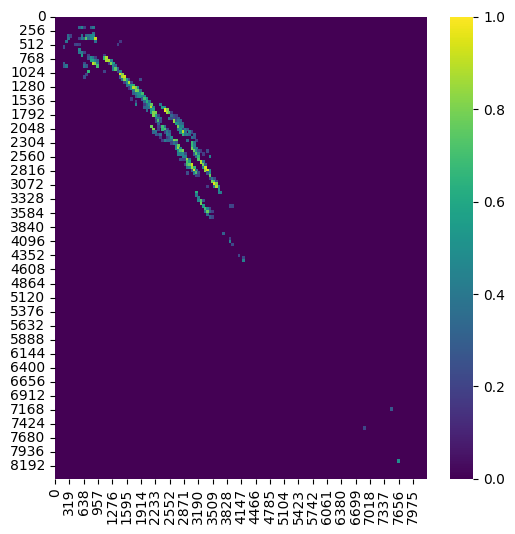

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(certainty_grid, cmap='viridis', vmin=0, vmax=1.0, cbar=True)
fig.savefig(os.path.join(data_dir, 'test.png'))

In [12]:
orig_cmap = plt.get_cmap('Greys')
cmap_n = orig_cmap.N
derived_cmap = orig_cmap(np.arange(cmap_n))

In [13]:
empty_grid = empty_grid + 1
empty_grid[empty_grid == 2] = 0

In [14]:
from matplotlib.colors import ListedColormap

In [15]:
sigmoid_cmap = derived_cmap.copy()
x = np.linspace(-10,10,cmap_n)
sigmoid_cmap[:,-1] = np.exp(x)/(np.exp(x) + 1)
sigmoid_cmap = ListedColormap(sigmoid_cmap)

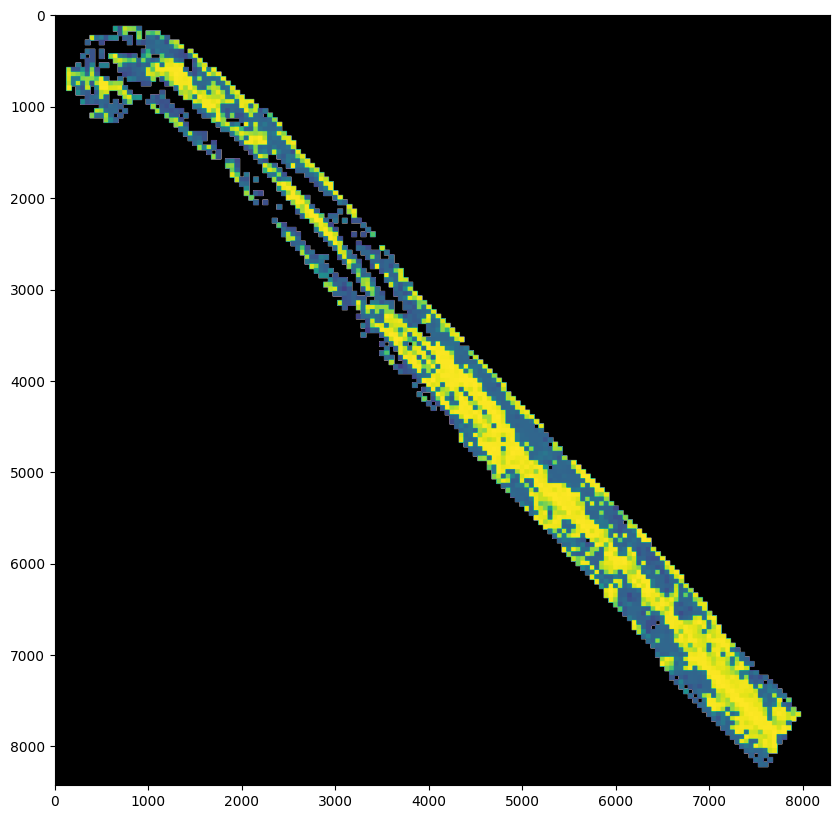

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.imshow(certainty_grid, cmap=cm_3, aspect='auto')
ax = plt.imshow(empty_grid, cmap=sigmoid_cmap, aspect='auto')
#norm = plt.Normalize(vmin=0, vmax=1.0)
#ax = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cm_3))
#fig.savefig(os.path.join(data_dir, 'certainty_line04_50overlap_transition_combination3_weighted_avg.png'))

In [ ]:
#mask = np.ma.masked_where(grid == 1, mosaic_raw)
mask = grid == 1
#masked_array = np.ma.compressed(mask)
new_grid = mosaic_raw.copy()
new_grid[~mask] = 0

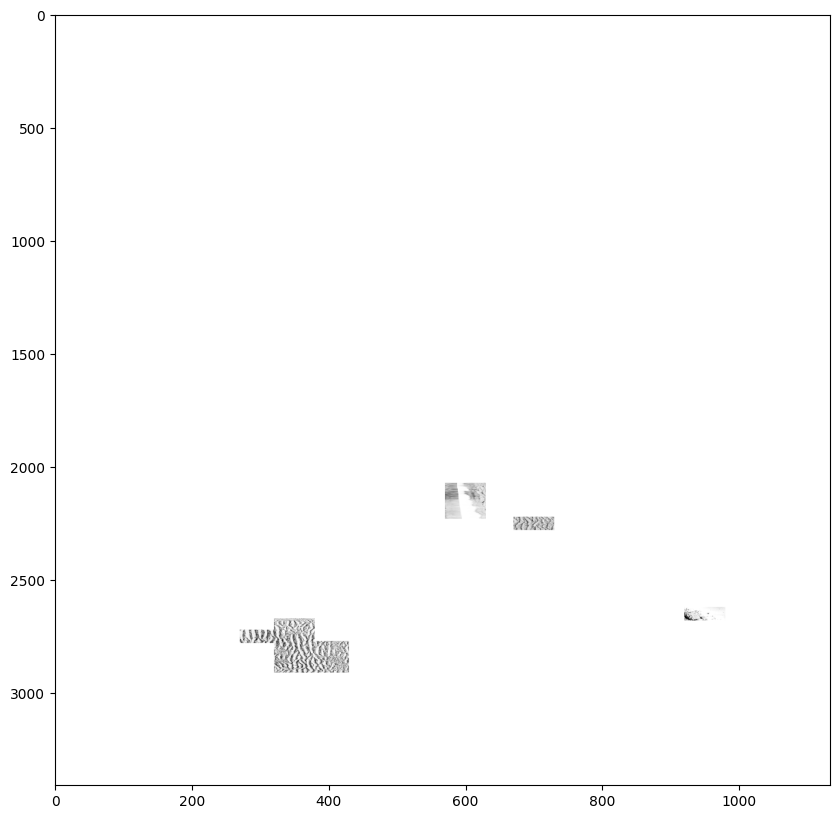

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid, cmap='Greys', aspect='auto')

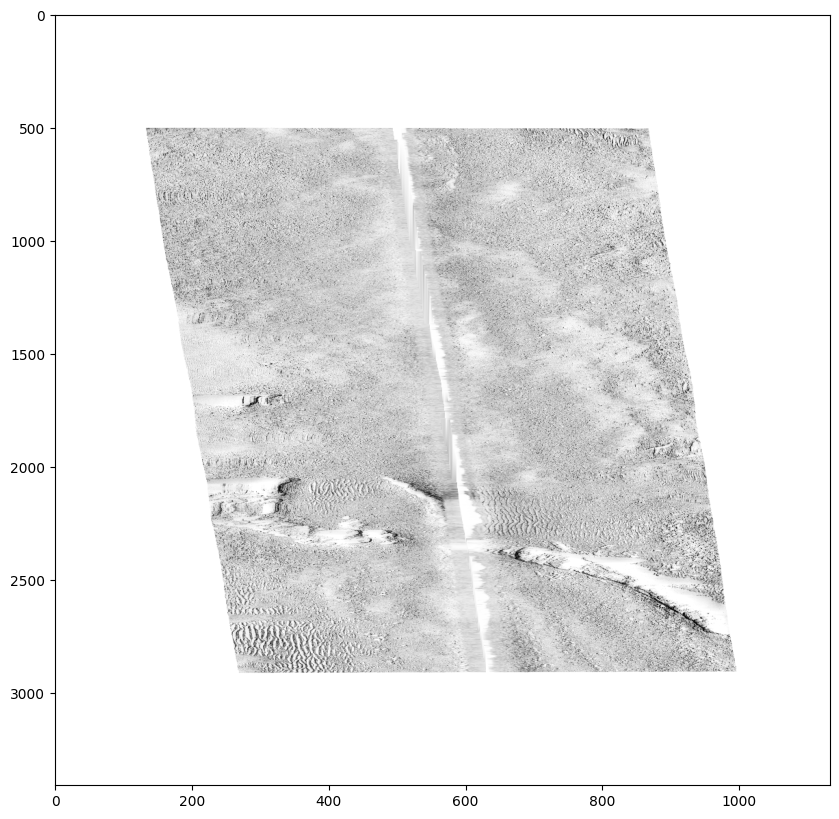

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(mosaic_raw, cmap='Greys', aspect='auto')

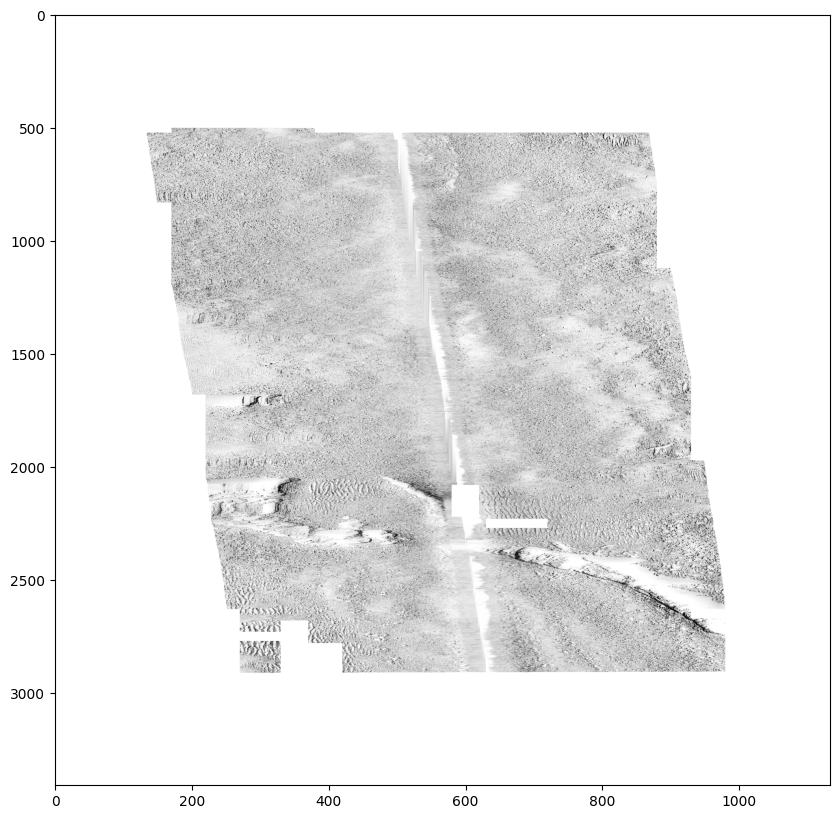

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid, cmap='Greys', aspect='auto')

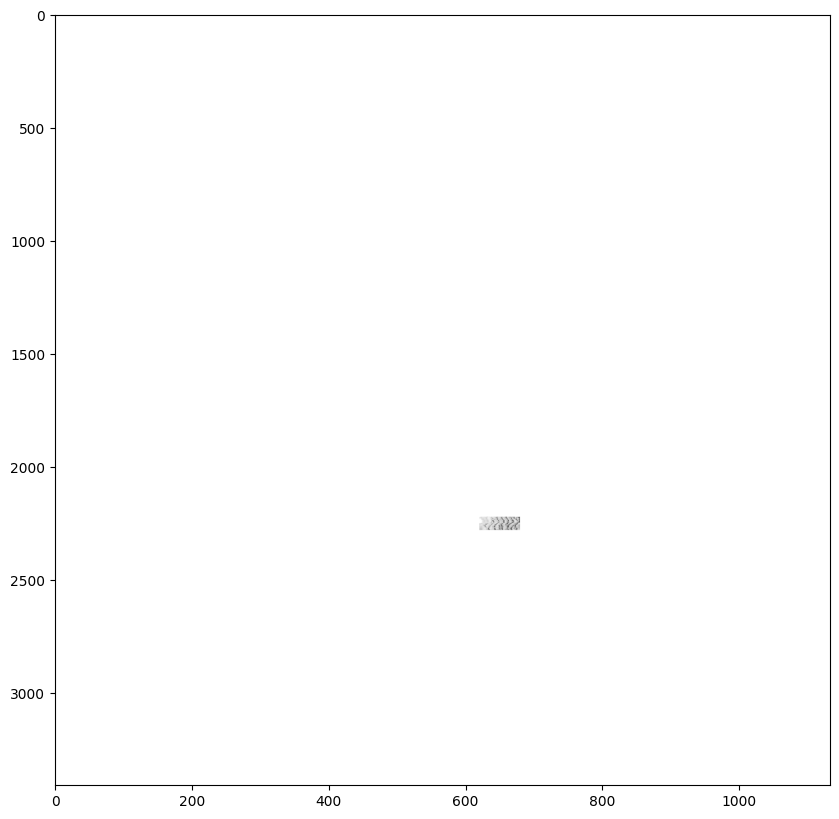

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid, cmap='Greys', aspect='auto')

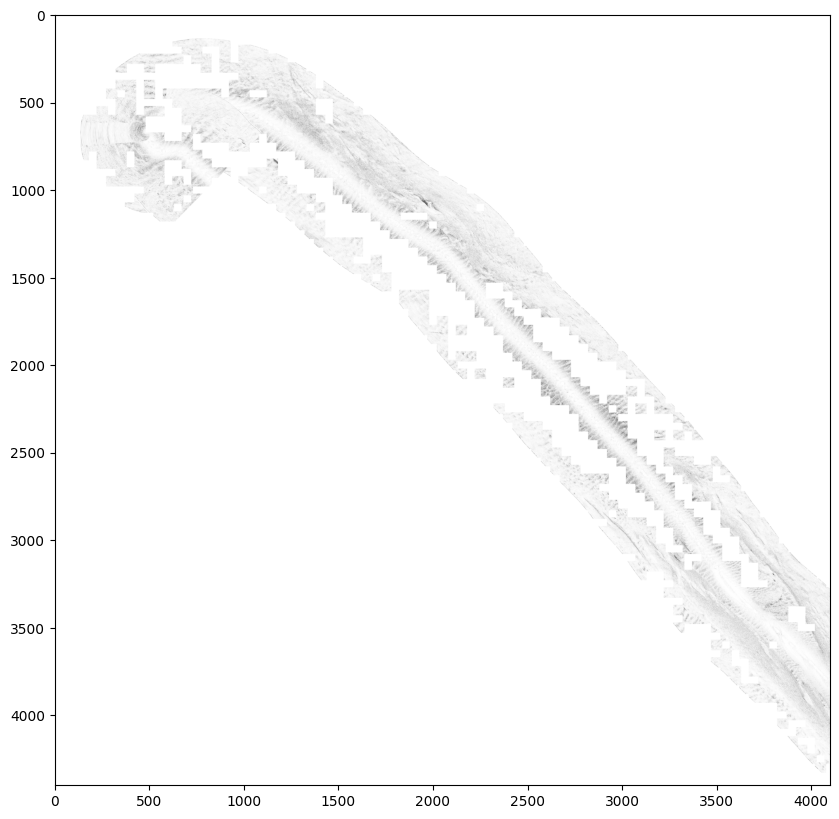

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid[:4400,:4100], cmap='Greys', aspect='auto')

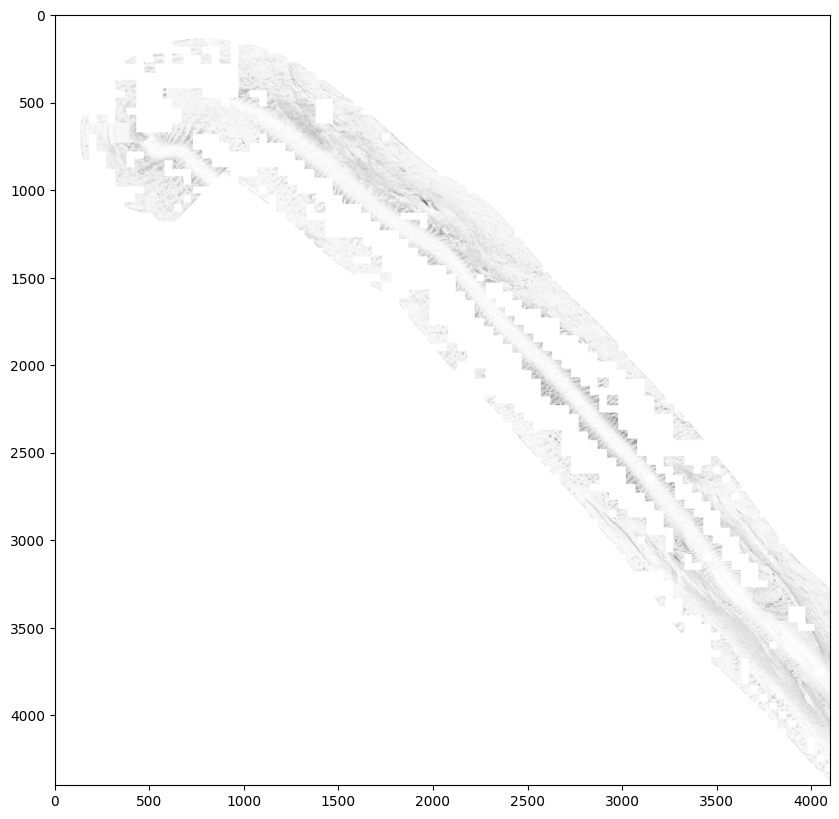

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid[:4400,:4100], cmap='Greys', aspect='auto')

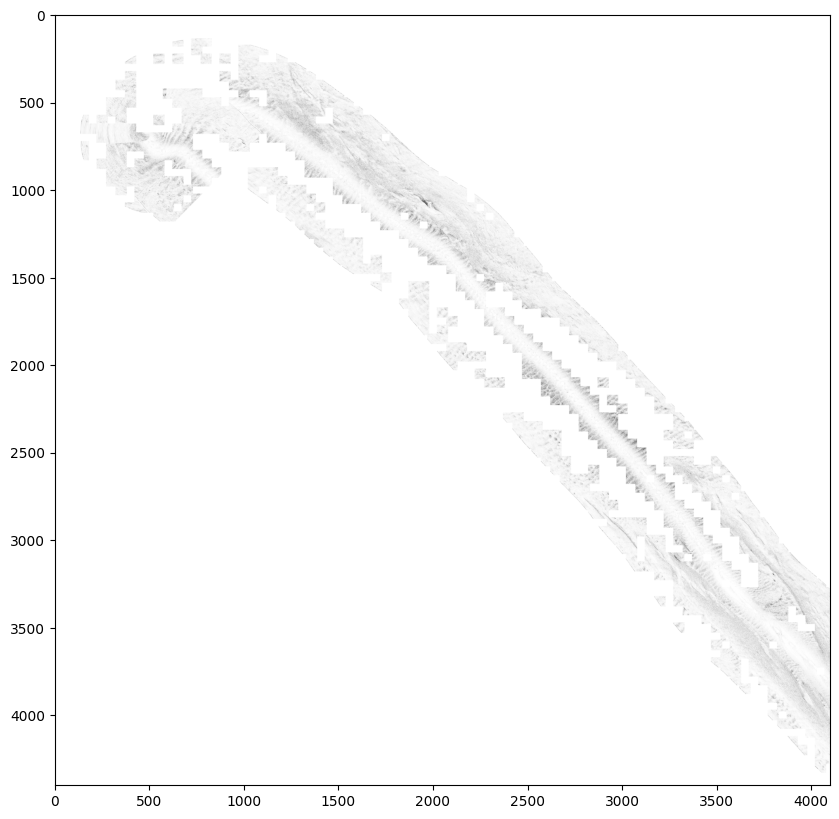

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax=plt.imshow(grid[:4400,:4100], cmap='Greys', aspect='auto')

In [ ]:
def write_ripples(a):
  x = [None for _ in range(a)]
  for i in range(a):
    x[i] = 'YES'
  return x
def write_transition(a):
  x = [None for _ in range(a)]
  for i in range(a):
    x[i] = 'T'
  return x
def write_not_ripples(a):
  x = [None for _ in range(a)]
  for i in range(a):
    x[i] = 'NO'
  return x

In [ ]:
first = write_ripples(1184)
second = write_transition(109)
third = write_not_ripples(15)
combination4_ripples = write_ripples(1308)

In [ ]:
results_combination4_ripples = np.concatenate((first, second, third))

In [ ]:
true_values_combination4 = np.concatenate((combination4_ripples, combination4_transition, combination4_not_ripples))
predicted_values_combination4 = np.concatenate((results_combination4_ripples, results_combination4_transition, results_combination4_not_ripples))

In [ ]:
confusion_combination1=confusion_matrix(true_values_combination1, predicted_values_combination1, normalize='true')
confusion_combination2=confusion_matrix(true_values_combination2, predicted_values_combination2, normalize='true')
confusion_combination3=confusion_matrix(true_values_combination3, predicted_values_combination3, normalize='true')
confusion_combination4=confusion_matrix(true_values_combination4, predicted_values_combination4, normalize='true')

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

<Figure size 1600x800 with 0 Axes>

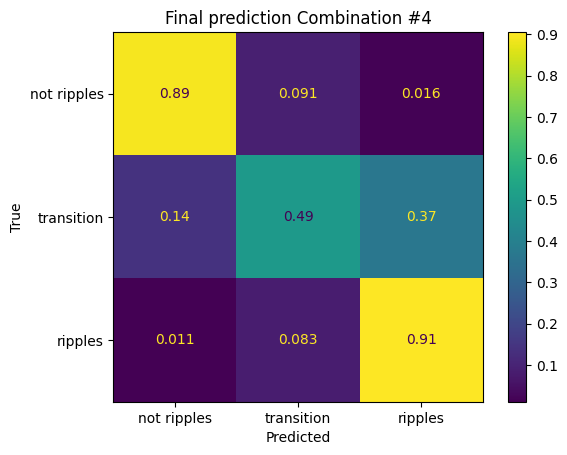

In [ ]:
labels_plot = ['not ripples', 'transition', 'ripples']

fig = plt.figure(figsize=(16, 8))
disp = ConfusionMatrixDisplay(confusion_matrix= confusion_combination4, display_labels=labels_plot)
disp.plot()
disp.ax_.set_title('Final prediction Combination #4')
disp.ax_.set(xlabel='Predicted', ylabel='True')

##Save grid as GeoTIFF

In [23]:
from rasterio.transform import Affine
import rasterio

In [55]:
def scalar_to_rgb(data):
    #Transform scalar-data to four dimensional RGBA data; the fourth is alpha
    #First we must normalize the data
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    #Map the scalar-data using colormap function from matplotlib
    #The default cmap used by matplotlib is 'viridis', but that can be changed
    #using different cmaps in the function below
    # cm = plt.cm.viridis
    #or a cmap defined by the user
    cm = cm_1
    #cm = plt.cm.gist_rainbow
    #cm = plt.cm.viridis

    rgb_data = cm(norm(data)) #four dimensional matrix
    """
    It is important to note that once the data is saved using a certain cmap,
    it CAN'T be changed when plotting.
    """
    #Now we re-escale the data from 0.0-1.0 float scale, to 0-255 integer scale
    rgb_data = (rgb_data[:,:,:3]*255).astype('uint8')
    # rgb_data = rgb_data.astype('uint8')
    return rgb_data

#save it first as png to create the rgb matrix
# plt.imsave('mosaic_png.png', mosaic, cmap=sss.Color_palette())

# img = cv2.imread('mosaic_png.png')  #cv2 read the images as bgr
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = scalar_to_rgb(grid)

file_x = 'XSMOOTH_UTM.txt'
file_y= 'YSMOOTH_UTM.txt'
x_utm = pd.read_csv(os.path.join(data_dir, file_x), sep=",")
y_utm = pd.read_csv(os.path.join(data_dir, file_y), sep=",")
x_utm = x_utm.to_numpy()
y_utm = y_utm.to_numpy()


res_x = 0.2
res_y = 0.2
X = np.arange(np.min(x_utm)-100, np.max(x_utm)+100, res_x)
Y = np.arange(np.min(y_utm)-100, np.max(y_utm)+100, res_y)
transform = Affine.translation(np.min(X) - res_x / 2, np.min(Y) - res_y / 2) * Affine.scale(res_x, res_y)
#reshape img to save as geotiff
#goes from [height,width,bands] to [bands, height, width]
image = np.moveaxis(img_rgb.squeeze(),-1,0)
new_dataset = rasterio.open(
    os.path.join(data_dir,'Line04_not_ripples_weighted_avg_V2.tif'),
    'w',
    driver='GTiff',
    height=grid.shape[0],
    width=grid.shape[1],
    count=3,
    dtype=img_rgb.dtype,
    crs='EPSG:32610',
    transform=transform,
)
new_dataset.write(image)
new_dataset.close()